# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import platform

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)

In [2]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [3]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'

In [4]:
if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Laser Data/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "Recordings2\\SubSet\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'Recordings2/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'Recordings2\\'

In [5]:
print(Computer, folder, rootfolder)

SciClone /sciclone/scr10/dchendrickson01/Laser Data/ /sciclone/home20/dchendrickson01/


In [6]:
#Extra Headers:
import os as os
import statistics as st
import random
#import multiprocessing
#from joblib import Parallel, delayed
import time
import CoreFunctions as cf
import pywt
import scipy.signal as signal
from matplotlib import ticker

my_cmap = plt.get_cmap('gray')

In [7]:
# Directory = './Data'
#Directory = 'C:\\Users\\Dan\\Desktop\\Temp\\'
#Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
files = os.listdir(folder)

In [8]:
for i in range(len(files)):
    print(i,files[i])

0 stack 27 moving away rom close.csv
1 Satck 25 starting to hoist.csv
2 stack 27 accelerating out of tz.csv
3 Stack 25 accelerating away end of transfer zone.csv
4 stack 25 leaving waterside transfer 1.csv
5 Stack 25 both cranes moving away, half speed by center anchor.csv
6 stack 27 bar impacting 20 foot contaienr.csv
7 Stack 25 empty bar hoist down in transfer zone.csv
8 stack 25 spreader hitting container.csv
9 Stack 25 full speed towards me, 200 foot away, noise in track.csv
10 stack 27 slowly entering tz.csv
11 Stack 25 hoisting up.csv
12 stack 27 coming towards and slowing down 2.csv
13 Stack 25 leaving waterside transfer.csv
14 stack 27 accelerating out of tz 3.csv
15 Stack 26 both cranes moving toward, halfway down track.csv
16 stack 27 both cranes moving fast away.csv
17 top and end - enter tz.csv
18 Stack 26 far crane moving near crane half way down stack stationary.csv
19 stack 27 coming towards and slowing down.csv
20 Stack 26 stationary crane far down track.csv
21 stack 27

In [9]:
WvltFam = pywt.families()
Wvlts = []
for Fam in WvltFam:
    temp = pywt.wavelist(Fam)
    for wvlt in temp:
        Wvlts.append(wvlt)
Wvlts.append('beta')        
print(Wvlts)

['haar', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'dmey', 'gaus1', 'gaus2', 'gaus3', 'gaus4'

In [10]:
location = '/sciclone/scr10/dchendrickson01/LaserPrints3/'

stime = time.time()

chunkSize=5000

#for file in files[:9]:
def fileImages(file, wvlt):
    if file[-4:] ==  '.csv':
        try:
            ODataSet = np.genfromtxt(open(folder+'/'+file,'r'), delimiter=',',skip_header=1)
    
            ODataSet = ODataSet[:,2:4]

            for coord in range(2):
                for j in range(np.shape(ODataSet)[0]-1):
                    try:
                        ODataSet[j,coord] = float(ODataSet[j,coord])
                    except:
                        ODataSet[j,coord] = ODataSet[j-1,coord]
                    if ODataSet[j,coord] == -999.999:
                        ODataSet[j,coord] = ODataSet[j-1,coord]

            Diffs = np.zeros(np.shape(ODataSet)[0])
            for j in range(np.shape(ODataSet)[0]-1):
                Diffs[j] = ODataSet[j,0] - ODataSet[j,1]
            norm = np.average(ODataSet[:,0])
            ODataSet[:,0]-=norm
            norm = np.average(ODataSet[:,1])
            ODataSet[:,1]-=norm
            norm = np.average(Diffs)
            Diffs[:]-=norm

            CleanDiff = cf.Smoothing(Diffs,2)
            Clean0 = cf.Smoothing(ODataSet[:,0],2)
            Clean1 = cf.Smoothing(ODataSet[:,1],2)

            for i in range(int(len(CleanDiff)/chunkSize)):
                start = i*chunkSize
                end = start+chunkSize-1

                fprint = cf.getThumbprint2(CleanDiff[start:end], wvlt, 500,10)
                cf.PlotFingerPrint(fprint.T, 'Channel Differences '+wvlt + file + ' at ' + str(start), location, True, Show=False)

                fprint = cf.getThumbprint2(Clean0[start:end], wvlt, 500, 10)
                cf.PlotFingerPrint(fprint.T, 'Channel 0 '+wvlt + file + ' at ' + str(start), location, True, Show=False)

                fprint = cf.getThumbprint2(Clean1[start:end], wvlt, 500, 10)
                cf.PlotFingerPrint(fprint.T, 'Channel 1 '+wvlt+ + file + ' at ' + str(start), location, True, Show=False)
        except:
            print(file)
    
    return 0
    

In [11]:
import multiprocessing
from joblib import Parallel, delayed

In [12]:
#nothiing = Parallel(n_jobs=30)(delayed(fileImages)(file) for file in files)

In [13]:
print('Done')
i = 102
file =files[i]

Done


In [14]:
# make all wavelets one file
ODataSet = np.genfromtxt(open(folder+'/'+file,'r'), delimiter=',',skip_header=1)
    
ODataSet = ODataSet[:,2:5]

In [15]:
for coord in range(2):
    for j in range(np.shape(ODataSet)[0]-1):
        try:
            ODataSet[j,coord] = float(ODataSet[j,coord])
        except:
            ODataSet[j,coord] = ODataSet[j-1,coord]
        if ODataSet[j,coord] == -999.999:
            ODataSet[j,coord] = ODataSet[j-1,coord]

Diffs = np.zeros(np.shape(ODataSet)[0])
for j in range(np.shape(ODataSet)[0]-1):
    Diffs[j] = ODataSet[j,0] - ODataSet[j,1]
norm = np.average(ODataSet[:,0])
ODataSet[:,0]-=norm
norm = np.average(ODataSet[:,1])
ODataSet[:,1]-=norm
norm = np.average(Diffs)
Diffs[:]-=norm

In [16]:
SR = 200000

In [17]:
yf = np.fft.rfft(ODataSet[:,1])
xf = np.fft.rfftfreq(len(ODataSet[:,0]), 1/SR)
yff=cf.Smoothing(np.abs(yf),2)

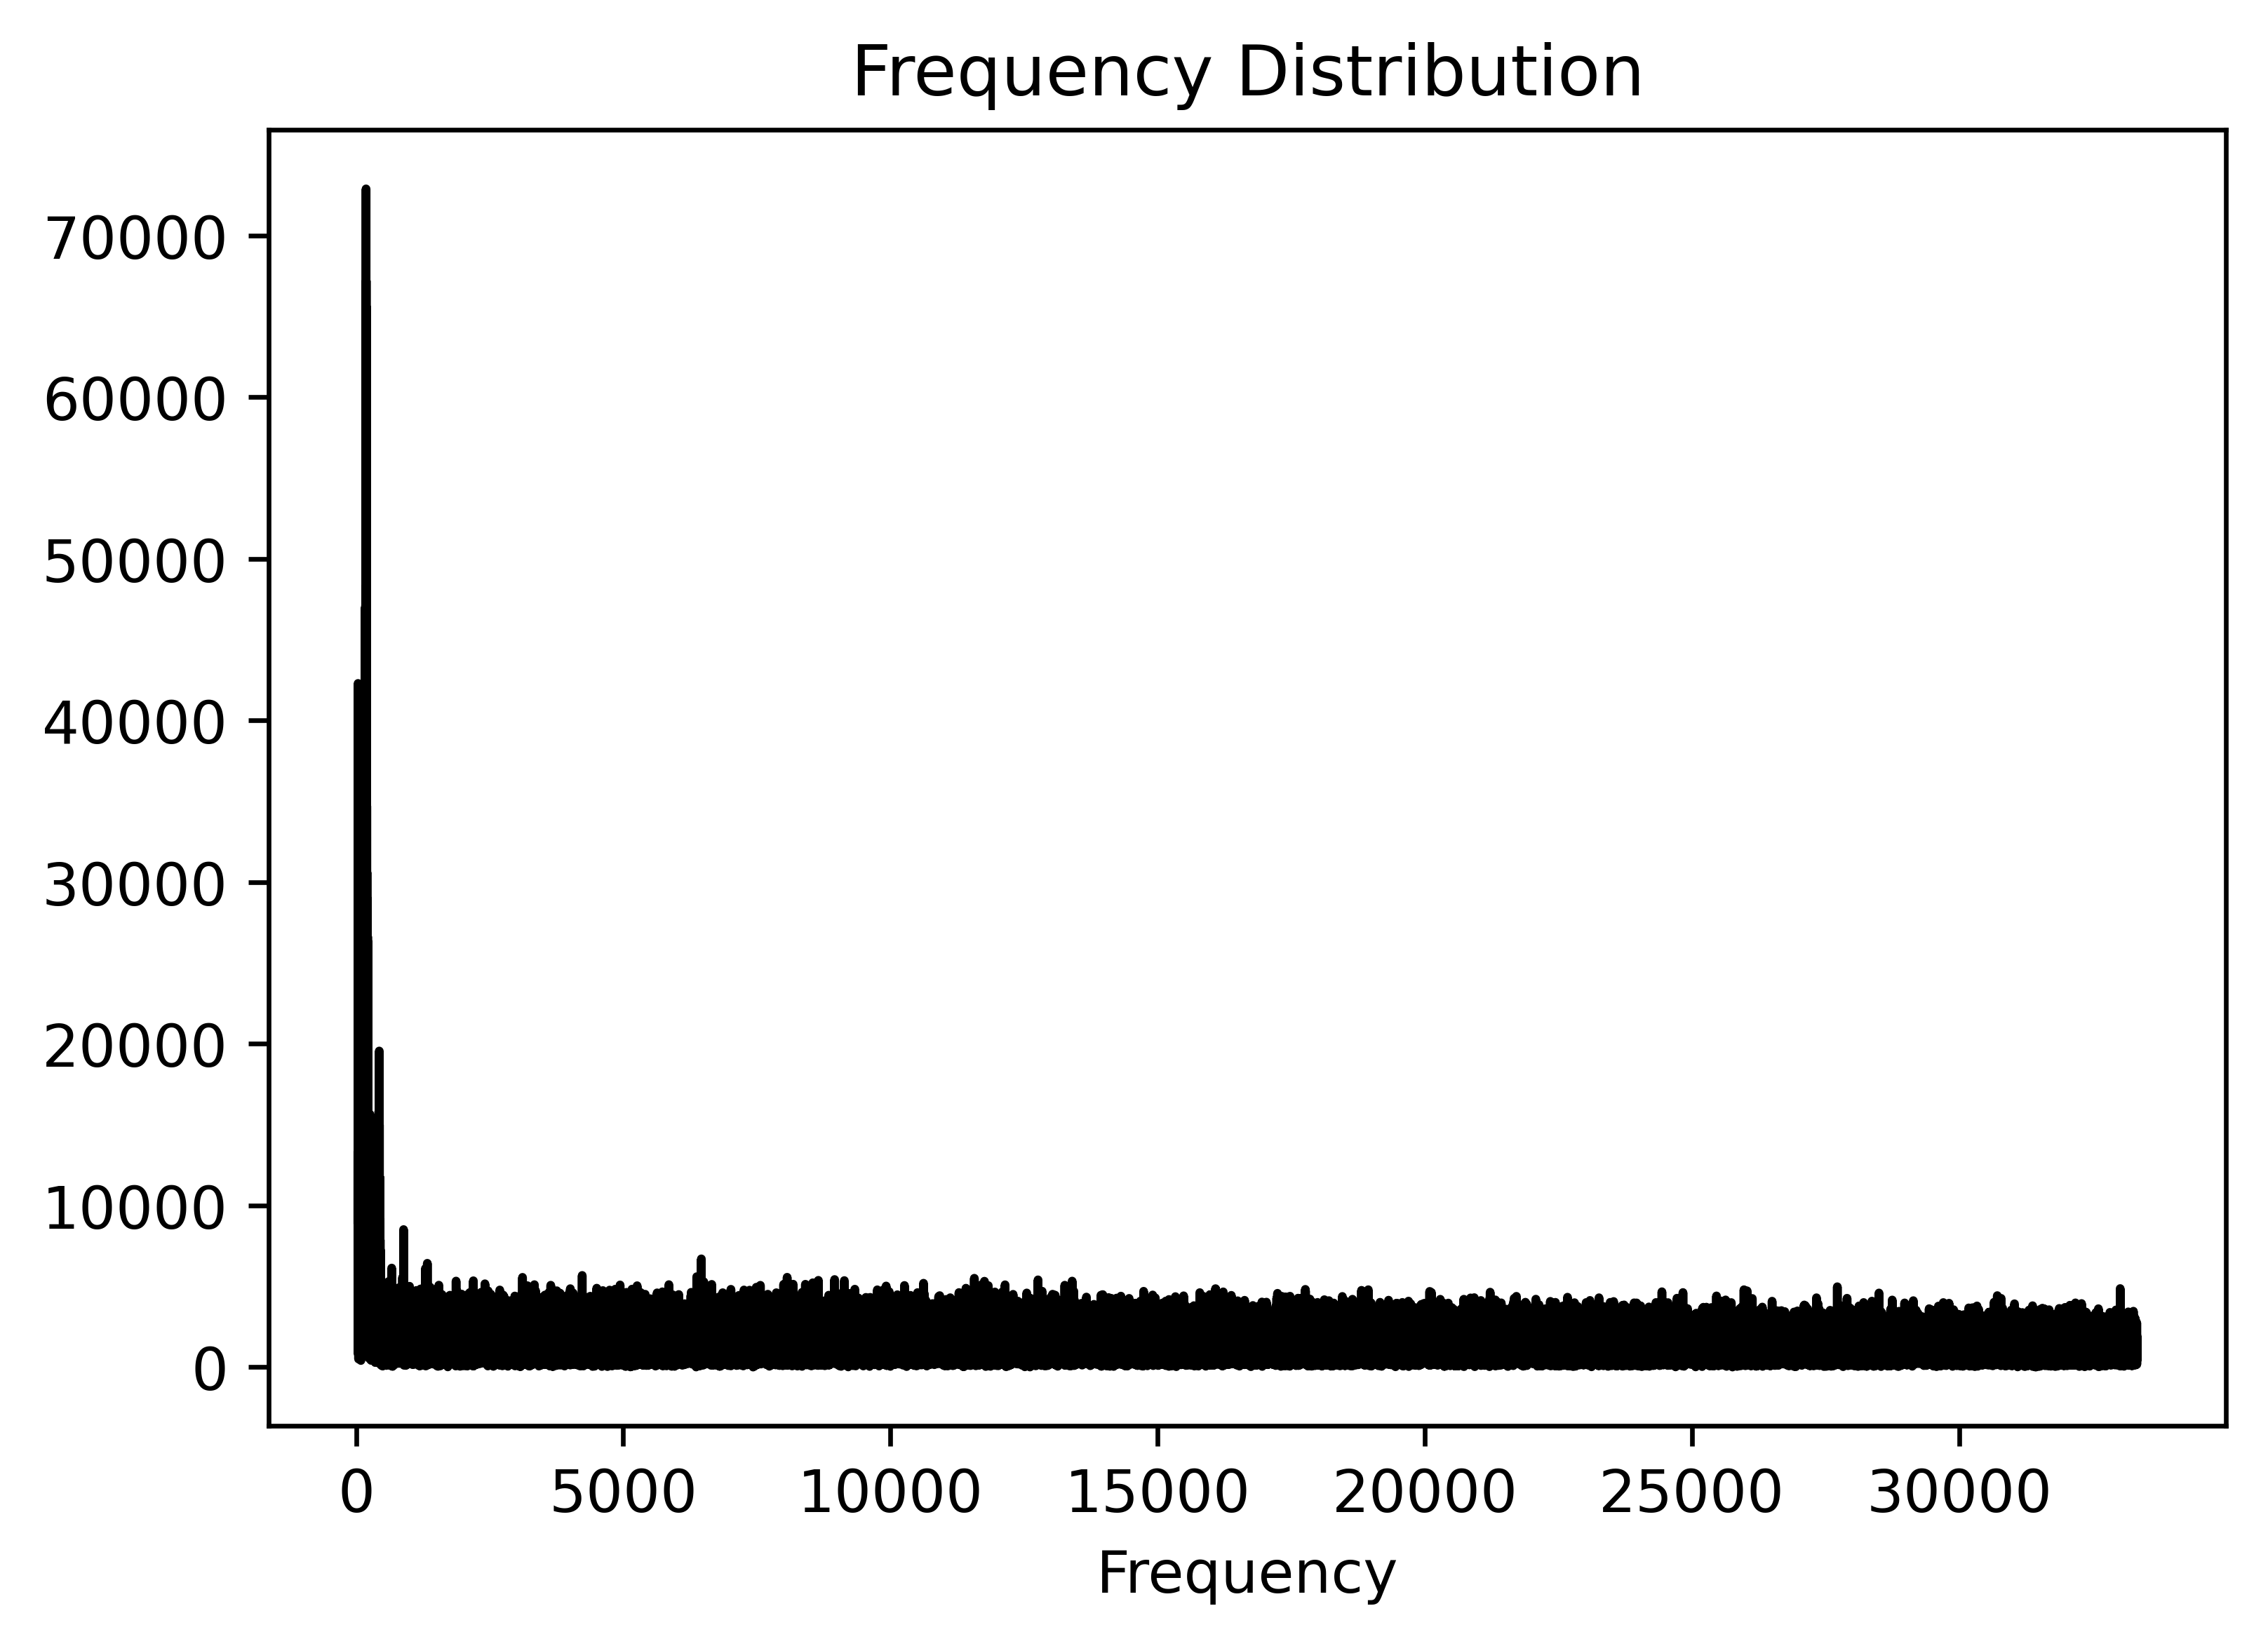

In [18]:
fig = plt.figure(figsize=(6,4),dpi=600)
plt.plot(xf[100:100000], np.abs(yf[100:100000]))
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.show()

In [19]:
#CleanDiff = cf.Smoothing(Diffs,3)
#Clean0 = cf.Smoothing(ODataSet[:,0],3)
Clean10 = cf.Smoothing(ODataSet[:,0],0)
Clean11 = cf.Smoothing(ODataSet[:,0],1)
Clean12 = cf.Smoothing(ODataSet[:,0],2,dets_to_remove=4)
Clean13 = cf.Smoothing(ODataSet[:,0],3)

In [20]:
Clean11b = np.zeros((int(len(ODataSet[:,0])/10)))

In [21]:
len(Clean11b)

59999

In [22]:
for i in range(len(Clean11b)):
    Clean11b[i]=np.average(ODataSet[i*10:i*10+10,0])
Clean11b = cf.Smoothing(Clean11b,3)

In [23]:
wvlt = 'db3'
Fdpi = 300
scales=500


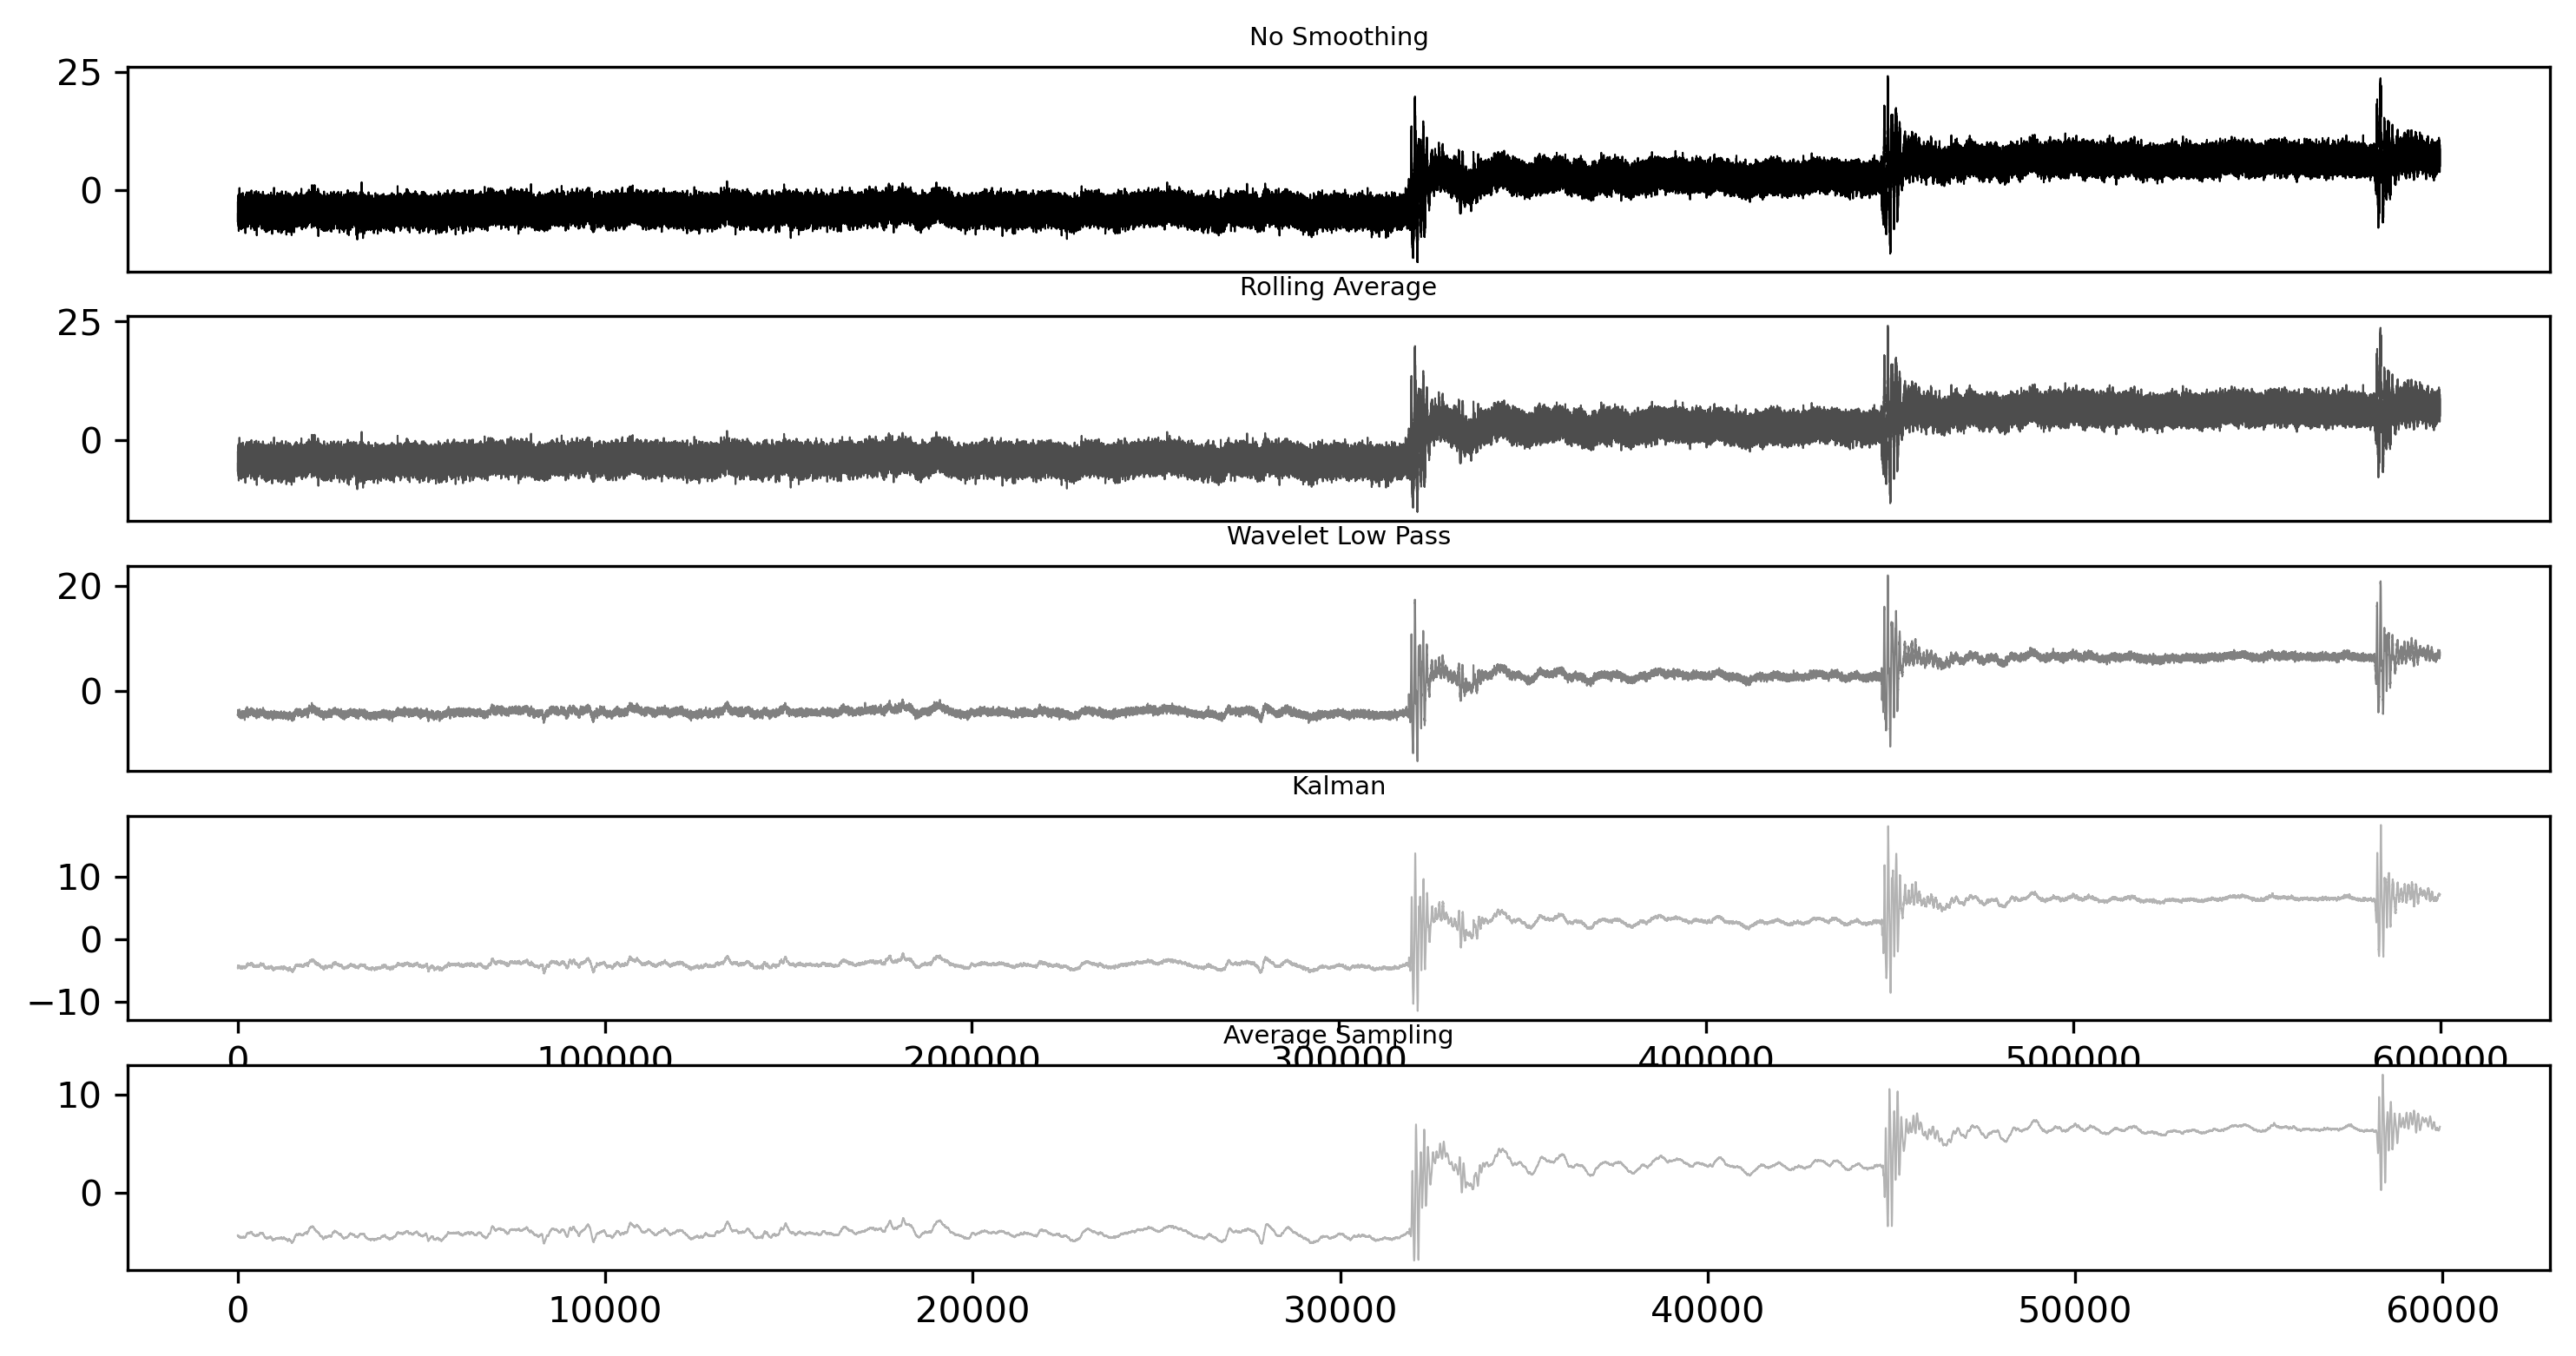

In [24]:
fig,axs = plt.subplots(5,figsize=(12,6), dpi=Fdpi)
plt.subplots_adjust(hspace=0.22)
axs[0].plot(Clean10[25:-50], linewidth=0.5)
axs[0].set_title('No Smoothing', fontsize=7)
axs[0].set_xticks([])
axs[1].plot(Clean11[25:-50], linewidth=0.5, color='0.3')
axs[1].set_title('Rolling Average', fontsize=7)
axs[1].set_xticks([])
axs[2].plot(Clean12[25:-50], linewidth=0.5,color='0.5')
axs[2].set_title('Wavelet Low Pass', fontsize=7)
axs[2].set_xticks([])
axs[3].plot(Clean13[25:-50], linewidth=0.5,color='0.7')
axs[3].set_title('Kalman', fontsize=7)
axs[4].plot(Clean11b[25:-50], linewidth=0.5,color='0.7')
axs[4].set_title('Average Sampling', fontsize=7)
plt.show()

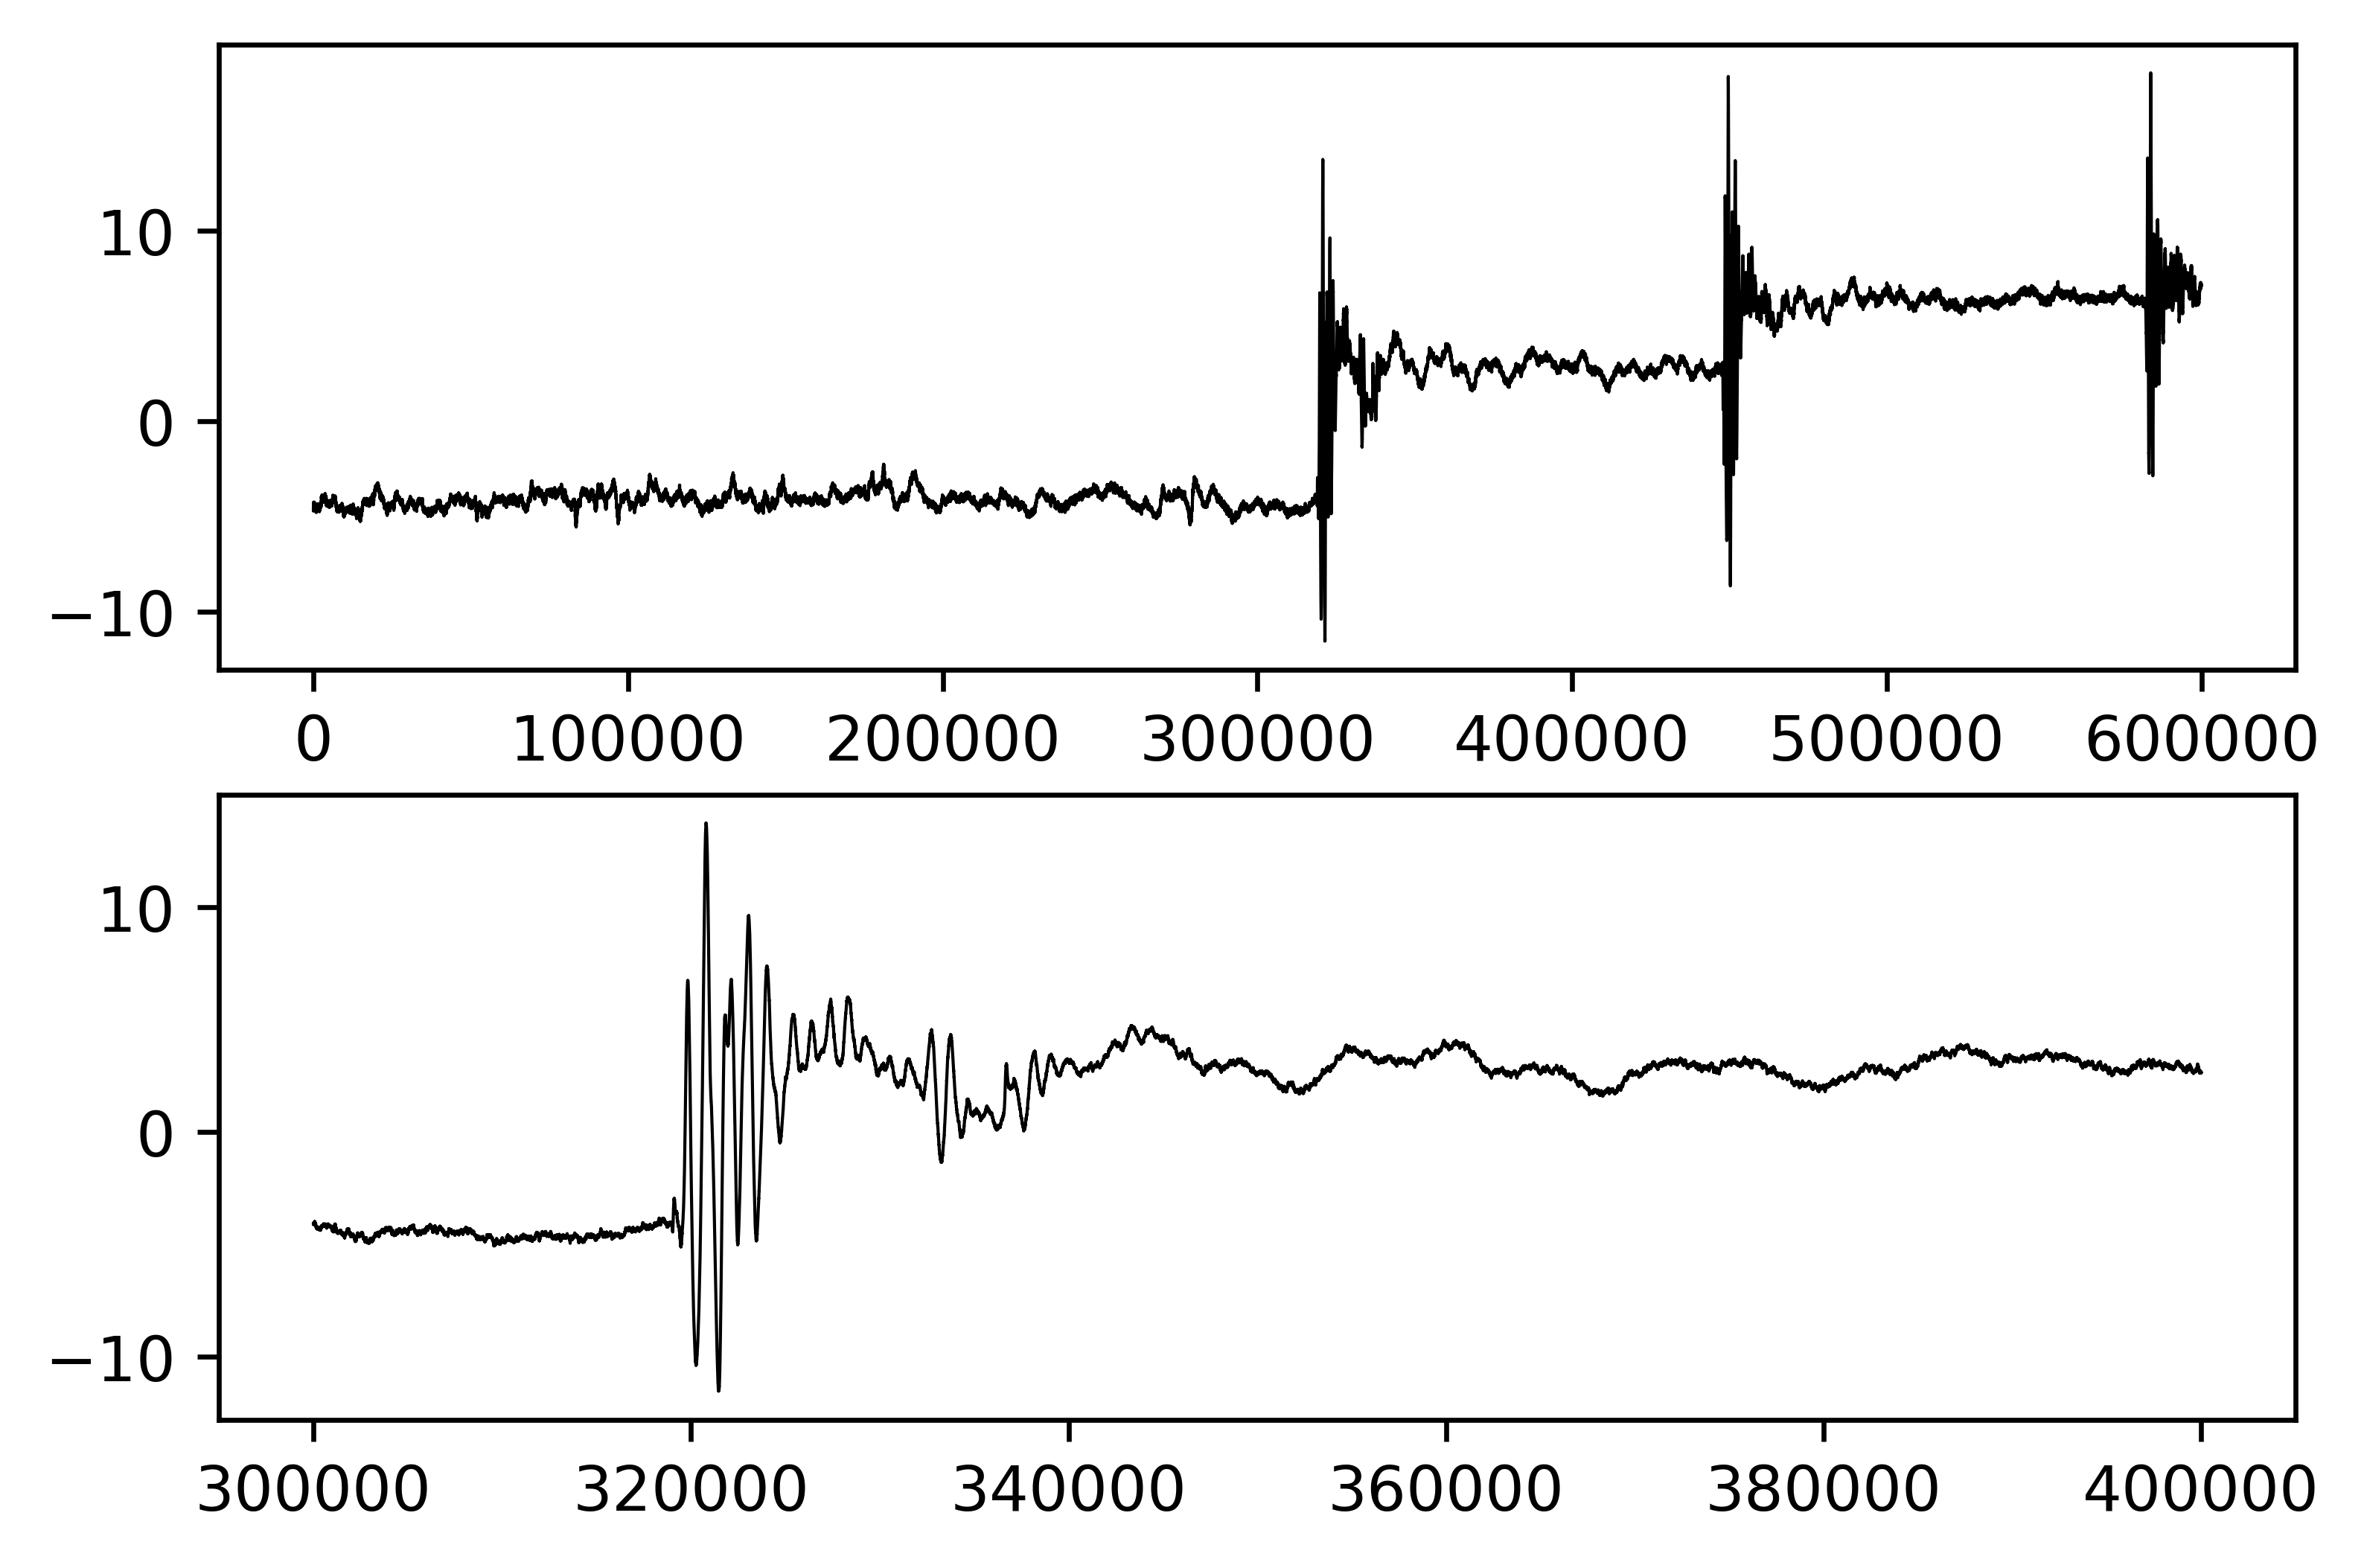

In [25]:
fig,axs = plt.subplots(2,figsize=(6,4), dpi=600)
axs[0].plot(Clean13[25:-50], linewidth=0.5)
axs[1].plot(np.linspace(300000,400000,100000),Clean13[300000:400000], linewidth=0.5)
plt.show()

In [26]:
Temp = np.zeros(100000)
Temp[:20000]=Clean12[300000:320000]-np.average(Clean12[300000:320000])
Temp[20000:]=Clean12[320000:400000]-np.average(Clean12[320000:400000])


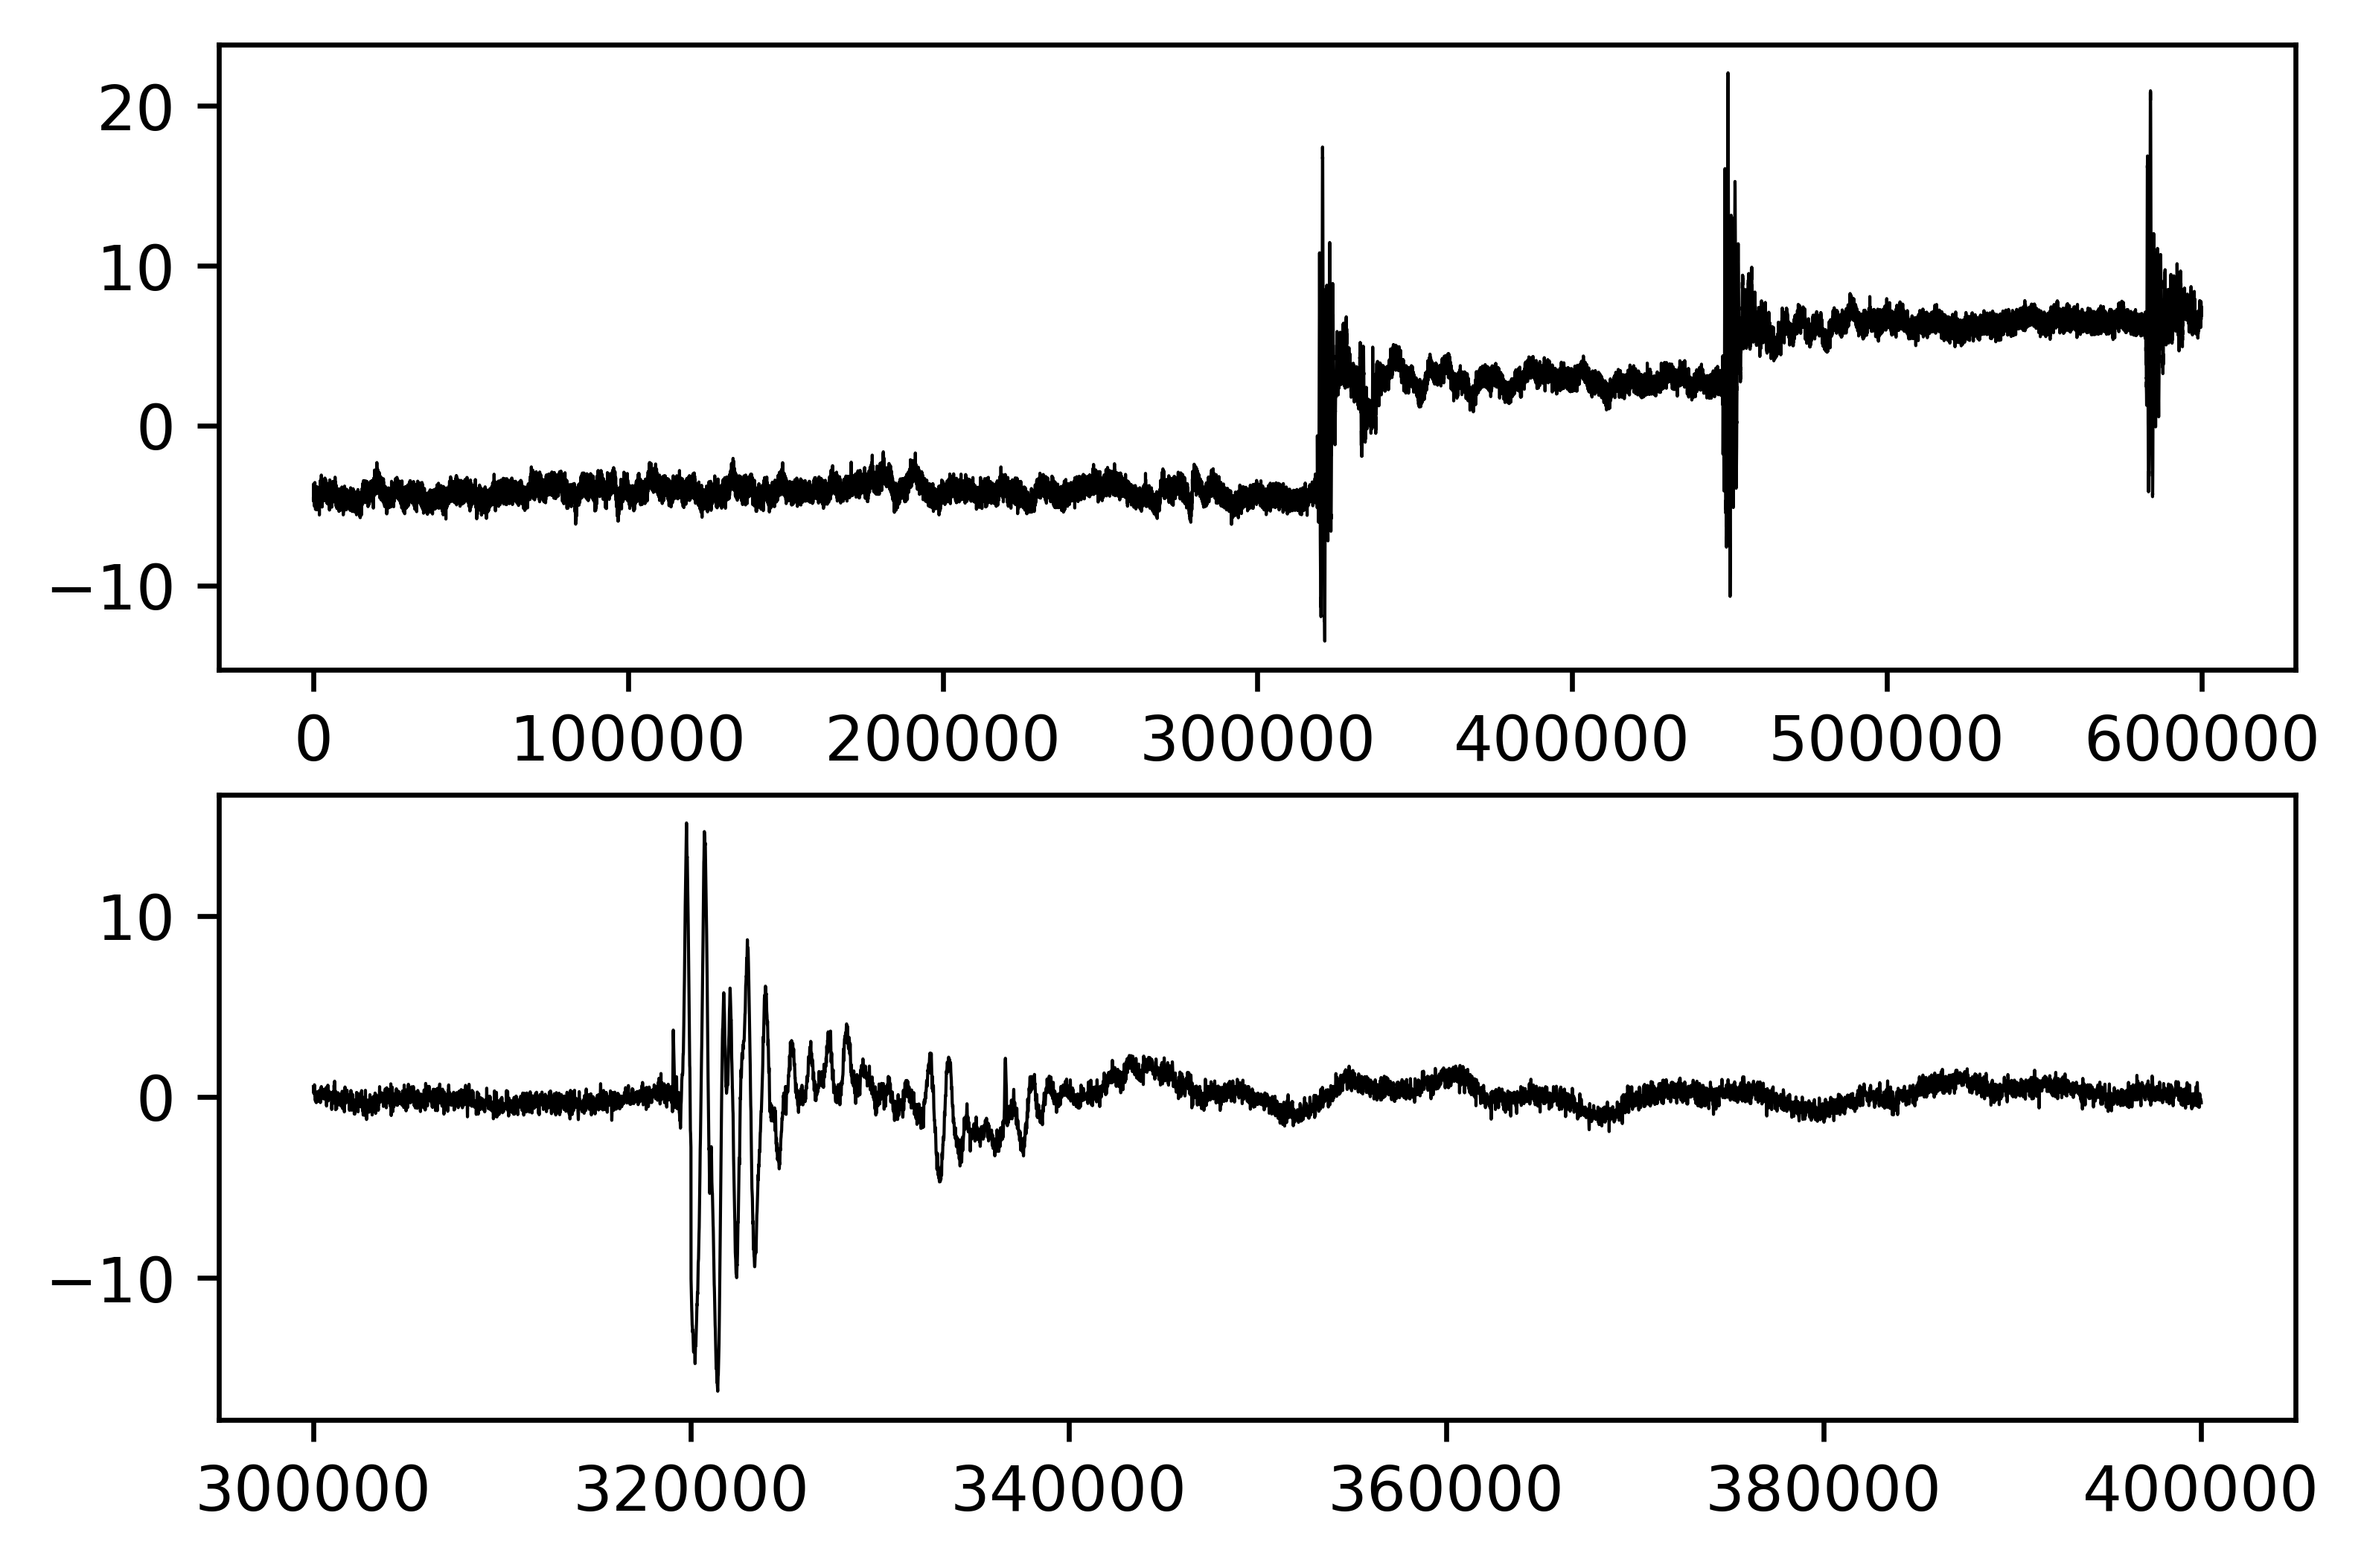

In [27]:
fig,axs = plt.subplots(2,figsize=(6,4), dpi=600)
axs[0].plot(Clean12[25:-50], linewidth=0.5)
axs[1].plot(np.linspace(300000,400000,100000),Temp, linewidth=0.5)
plt.show()

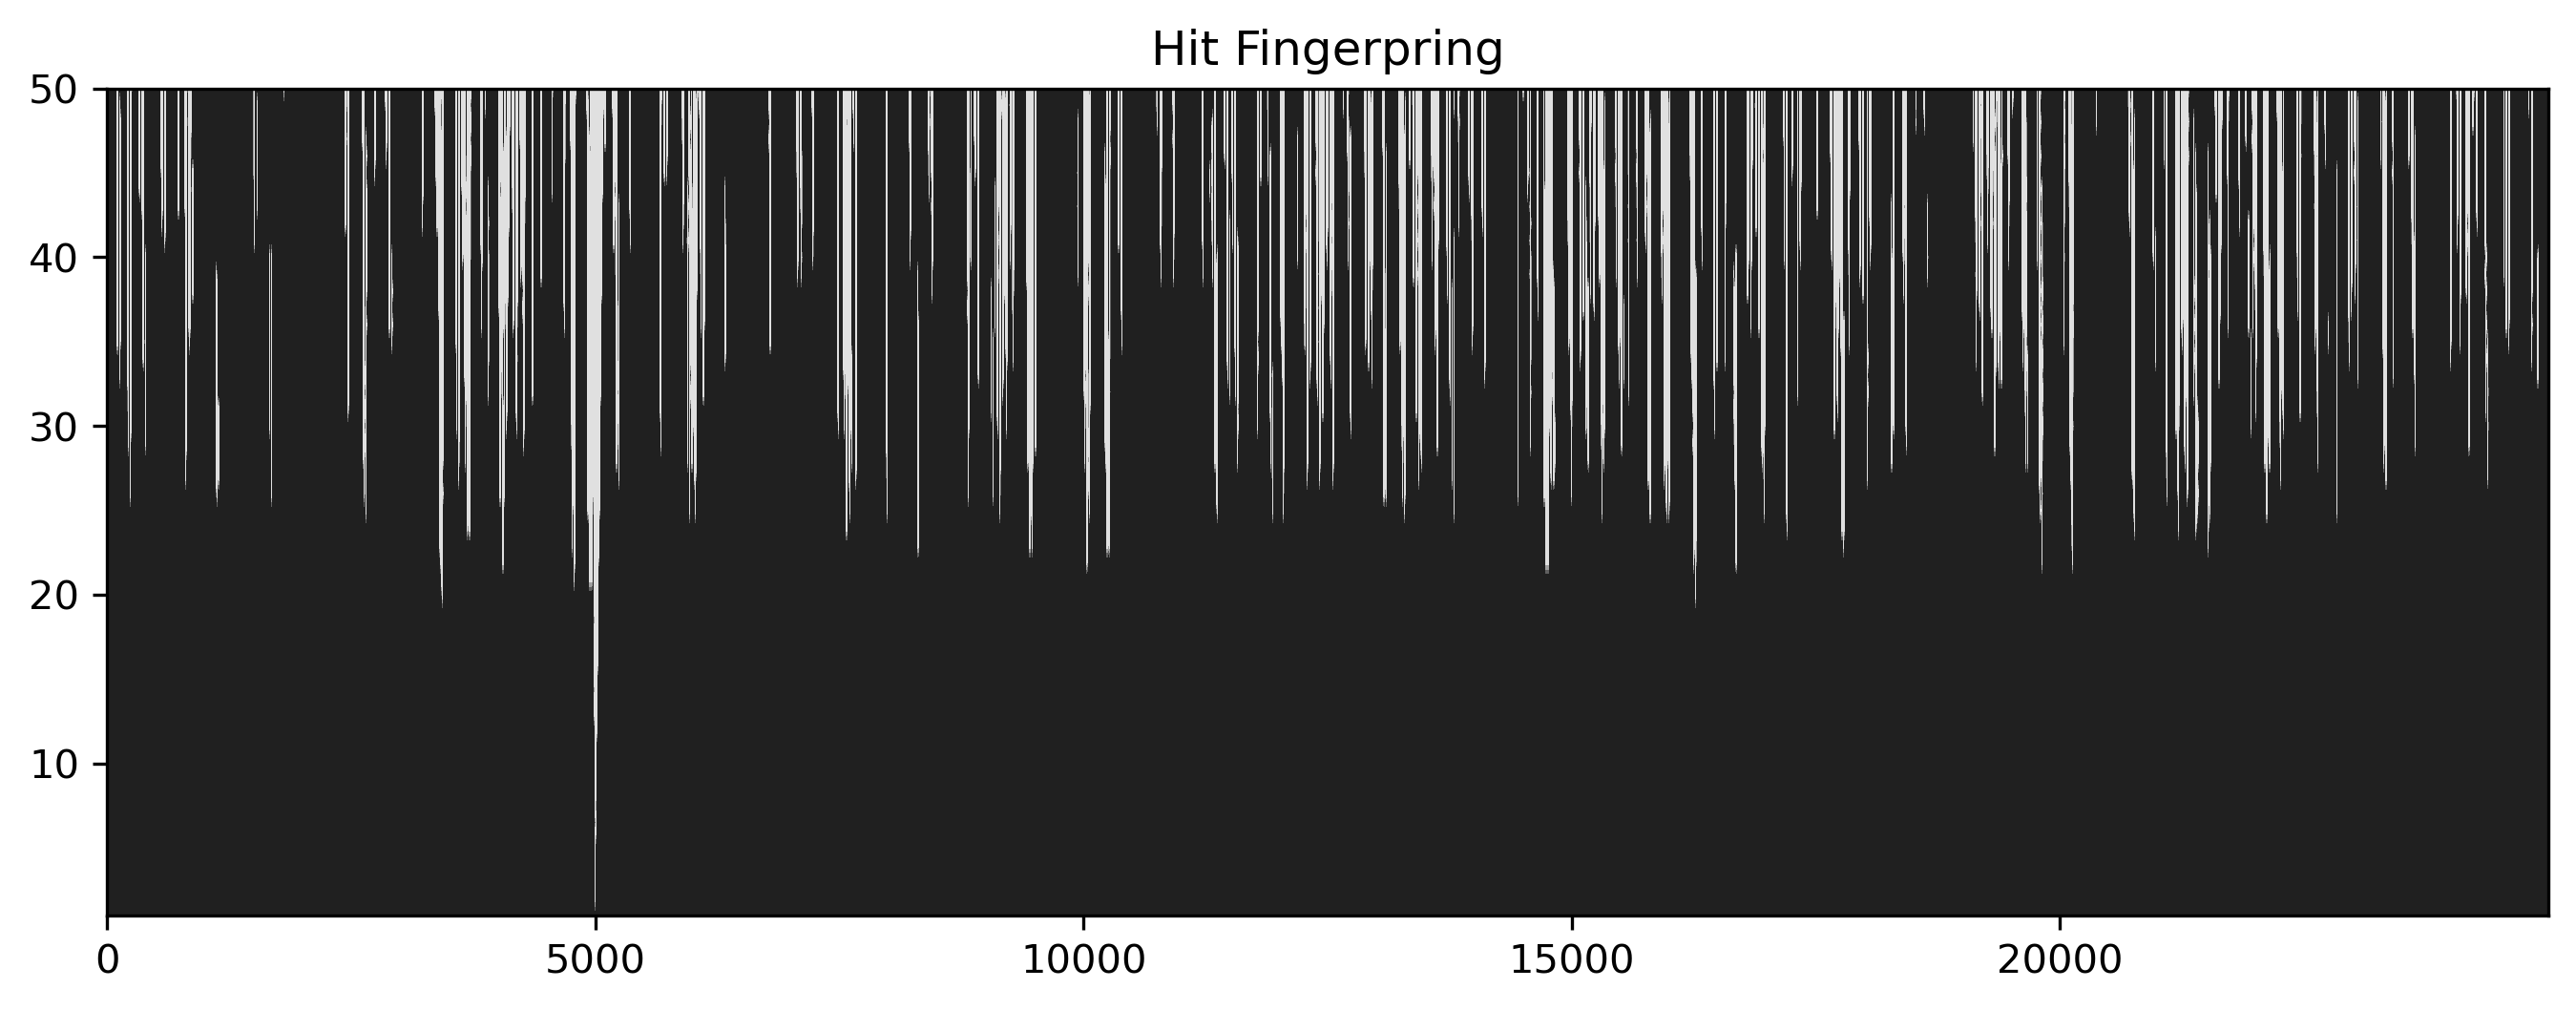

1

In [28]:
fprint10 = cf.getThumbprint2(Temp[15000:40000], wvlt, 50,1)
cf.PlotFingerPrint(fprint10.T, 'Hit Fingerpring' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

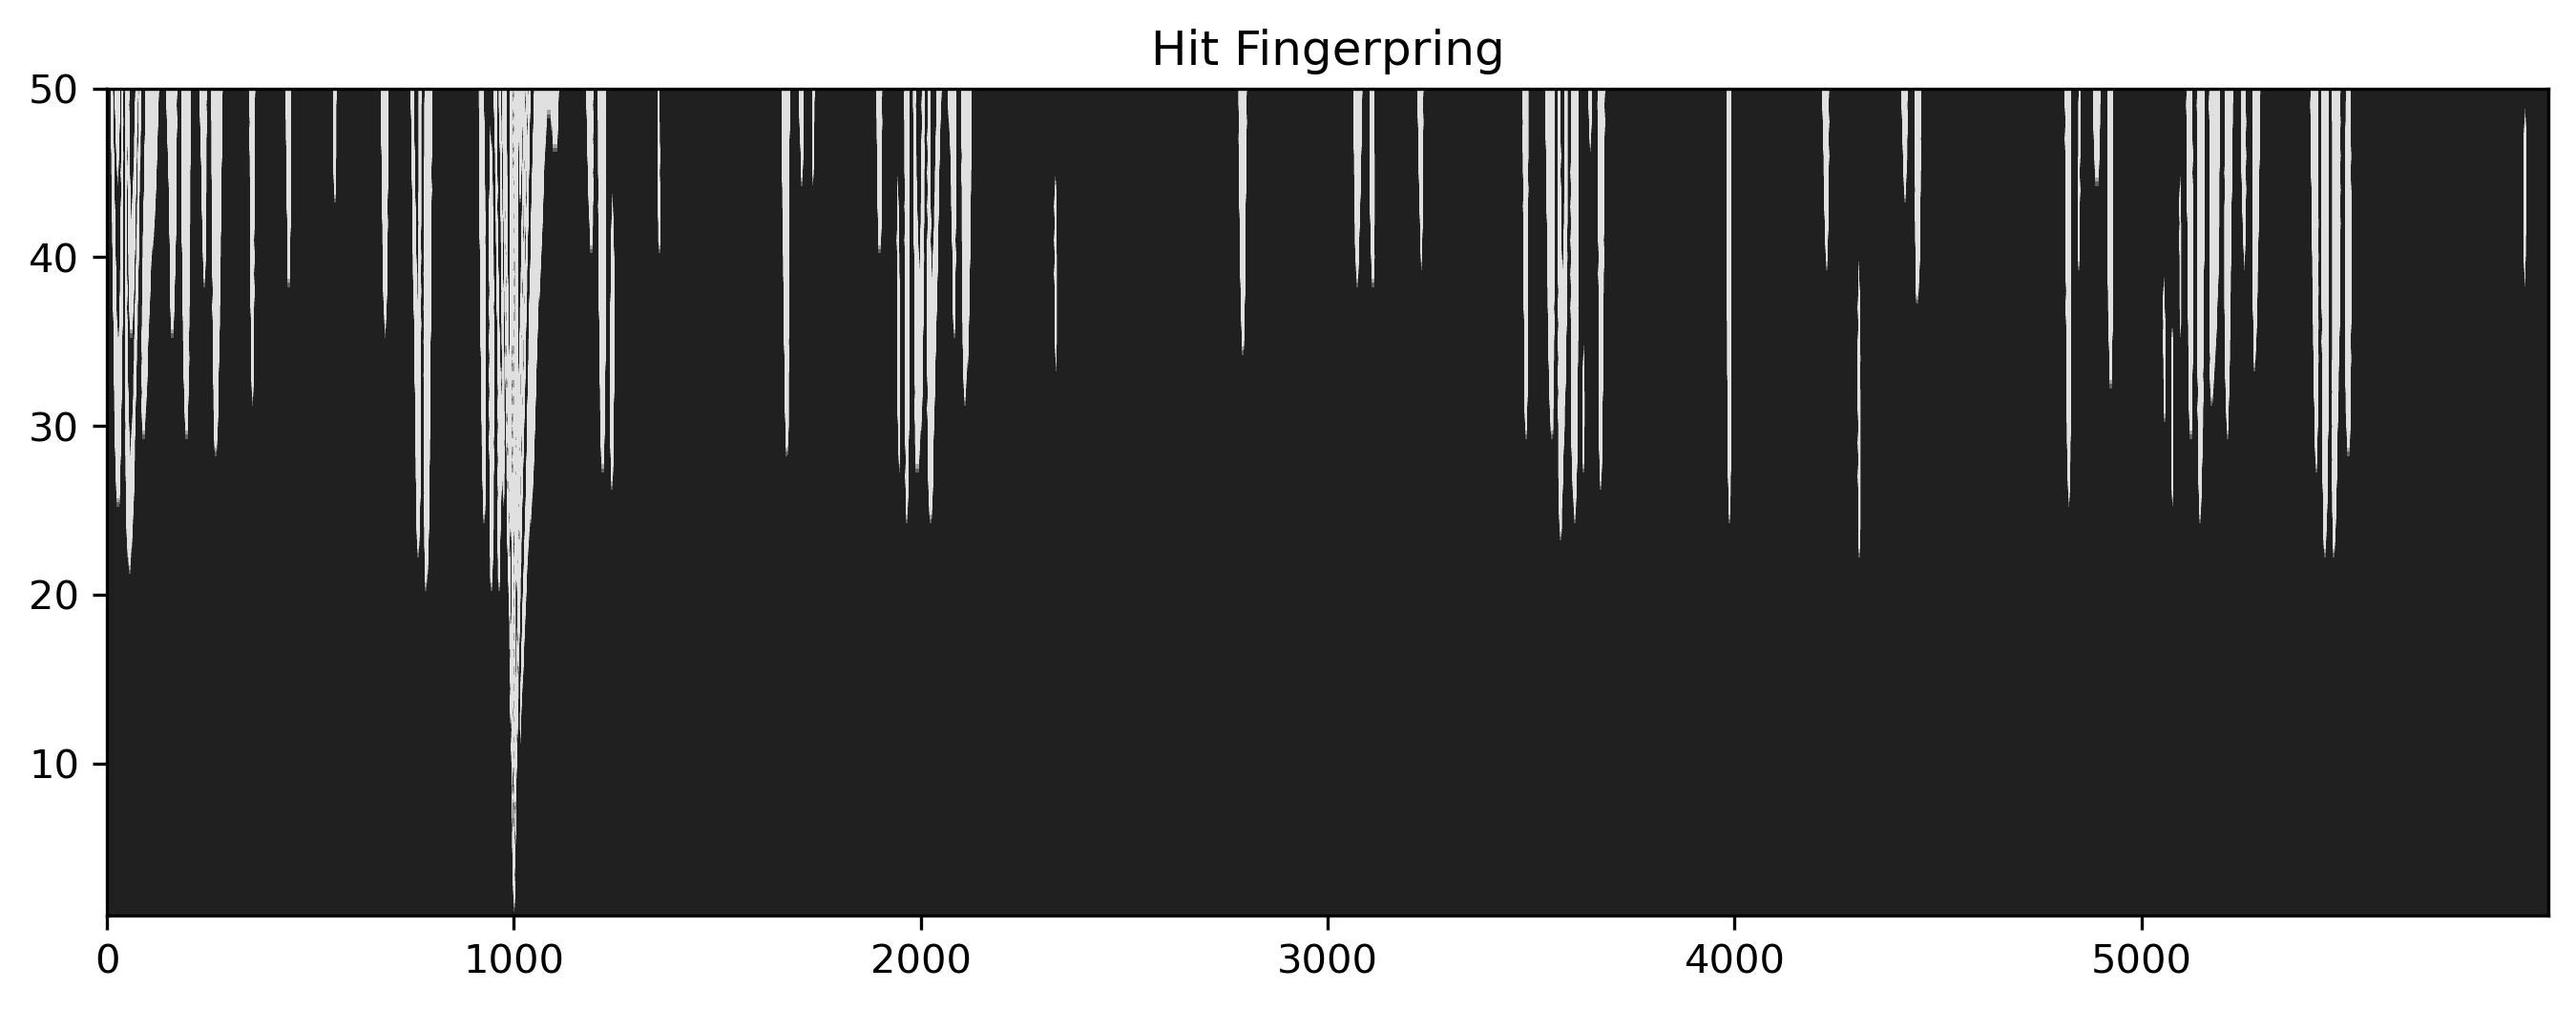

1

In [29]:
cf.PlotFingerPrint(fprint10[4000:10000,:].T, 'Hit Fingerpring' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

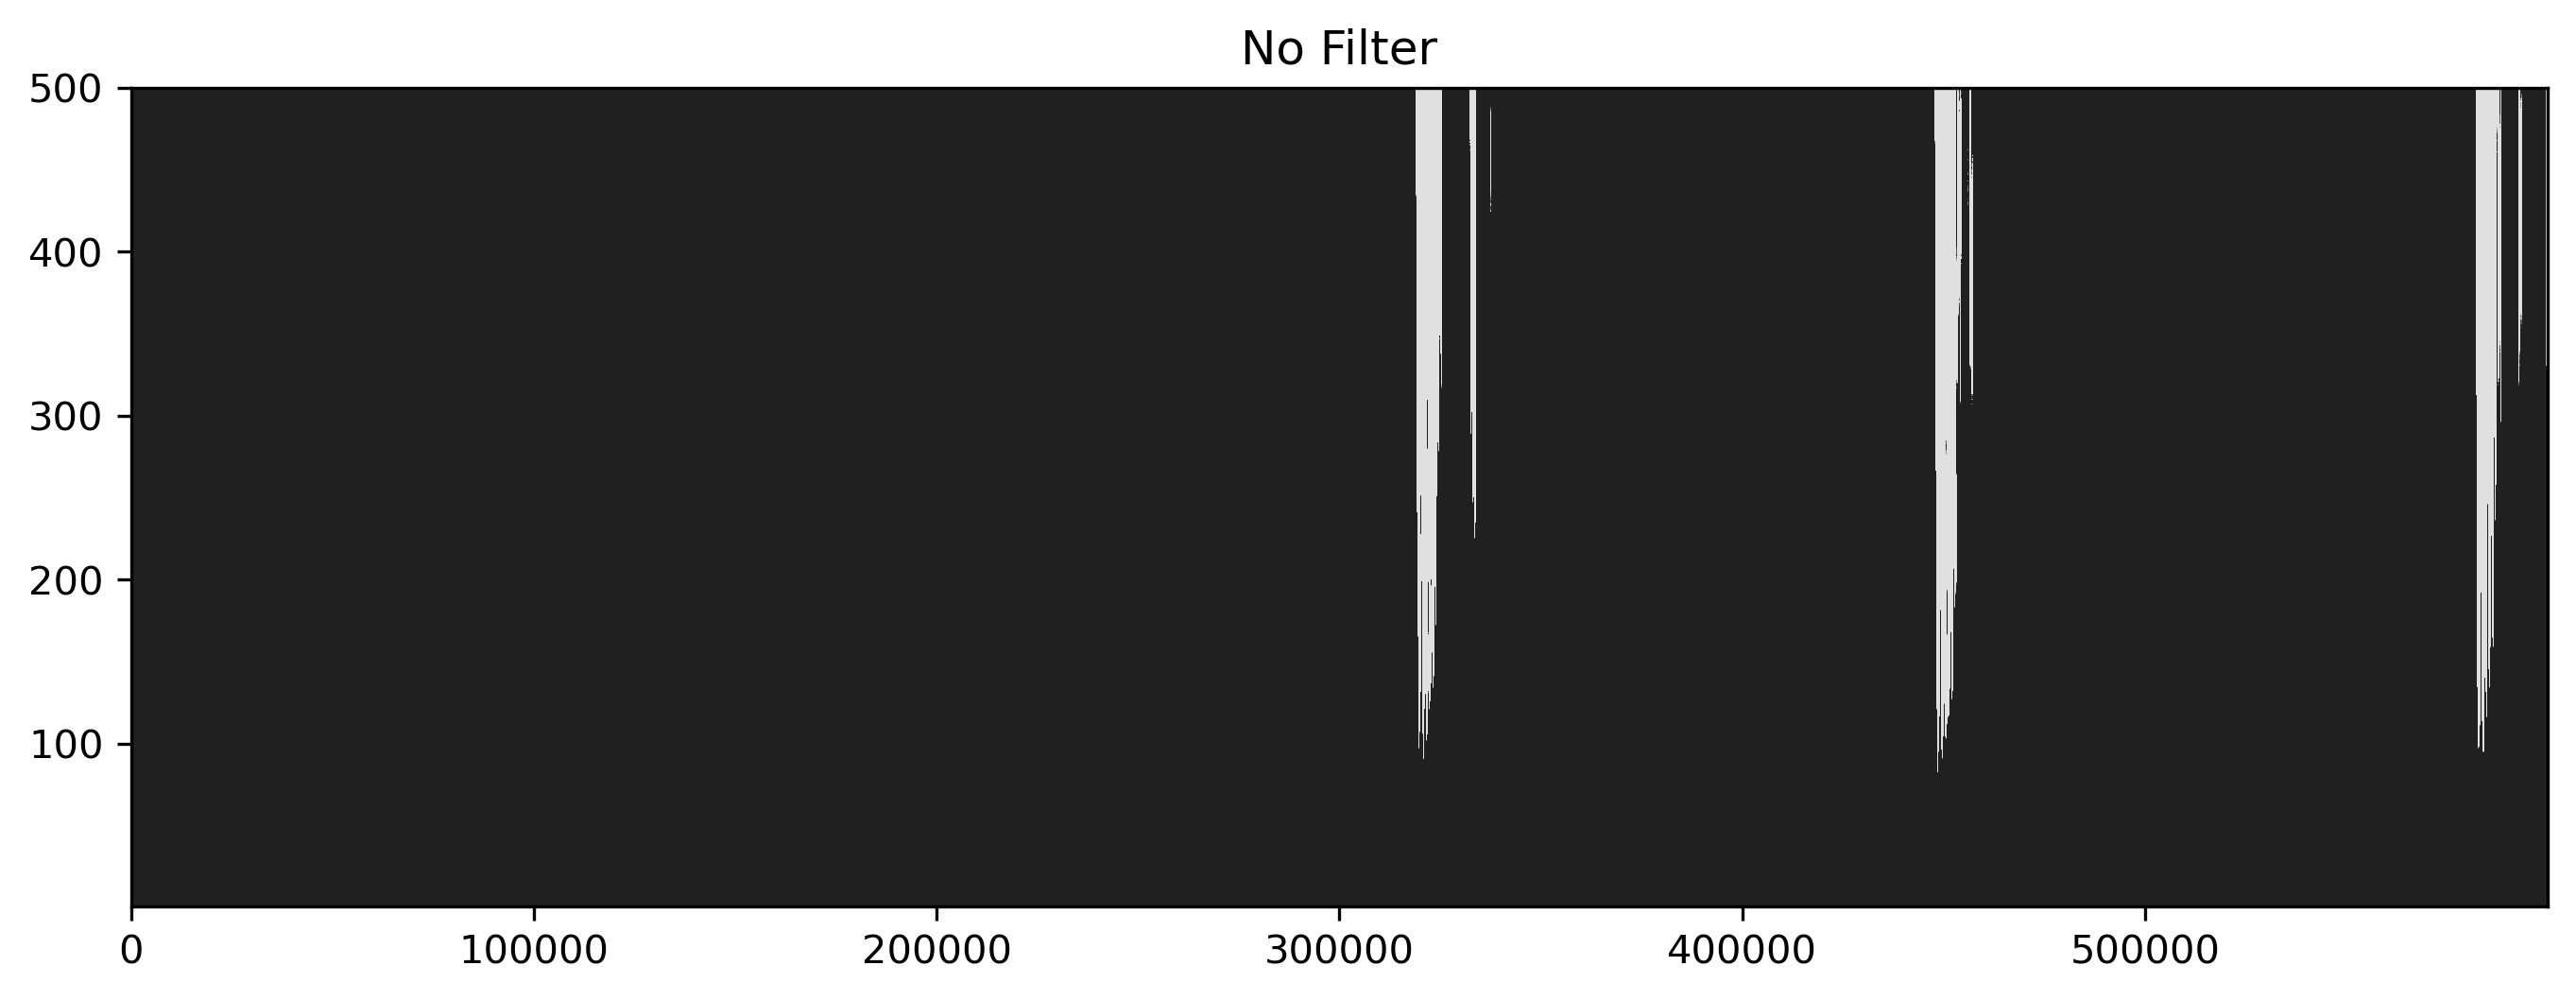

1

In [30]:
fprint10 = cf.getThumbprint2(Clean10, wvlt, scales,2)
cf.PlotFingerPrint(fprint10.T, 'No Filter' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)


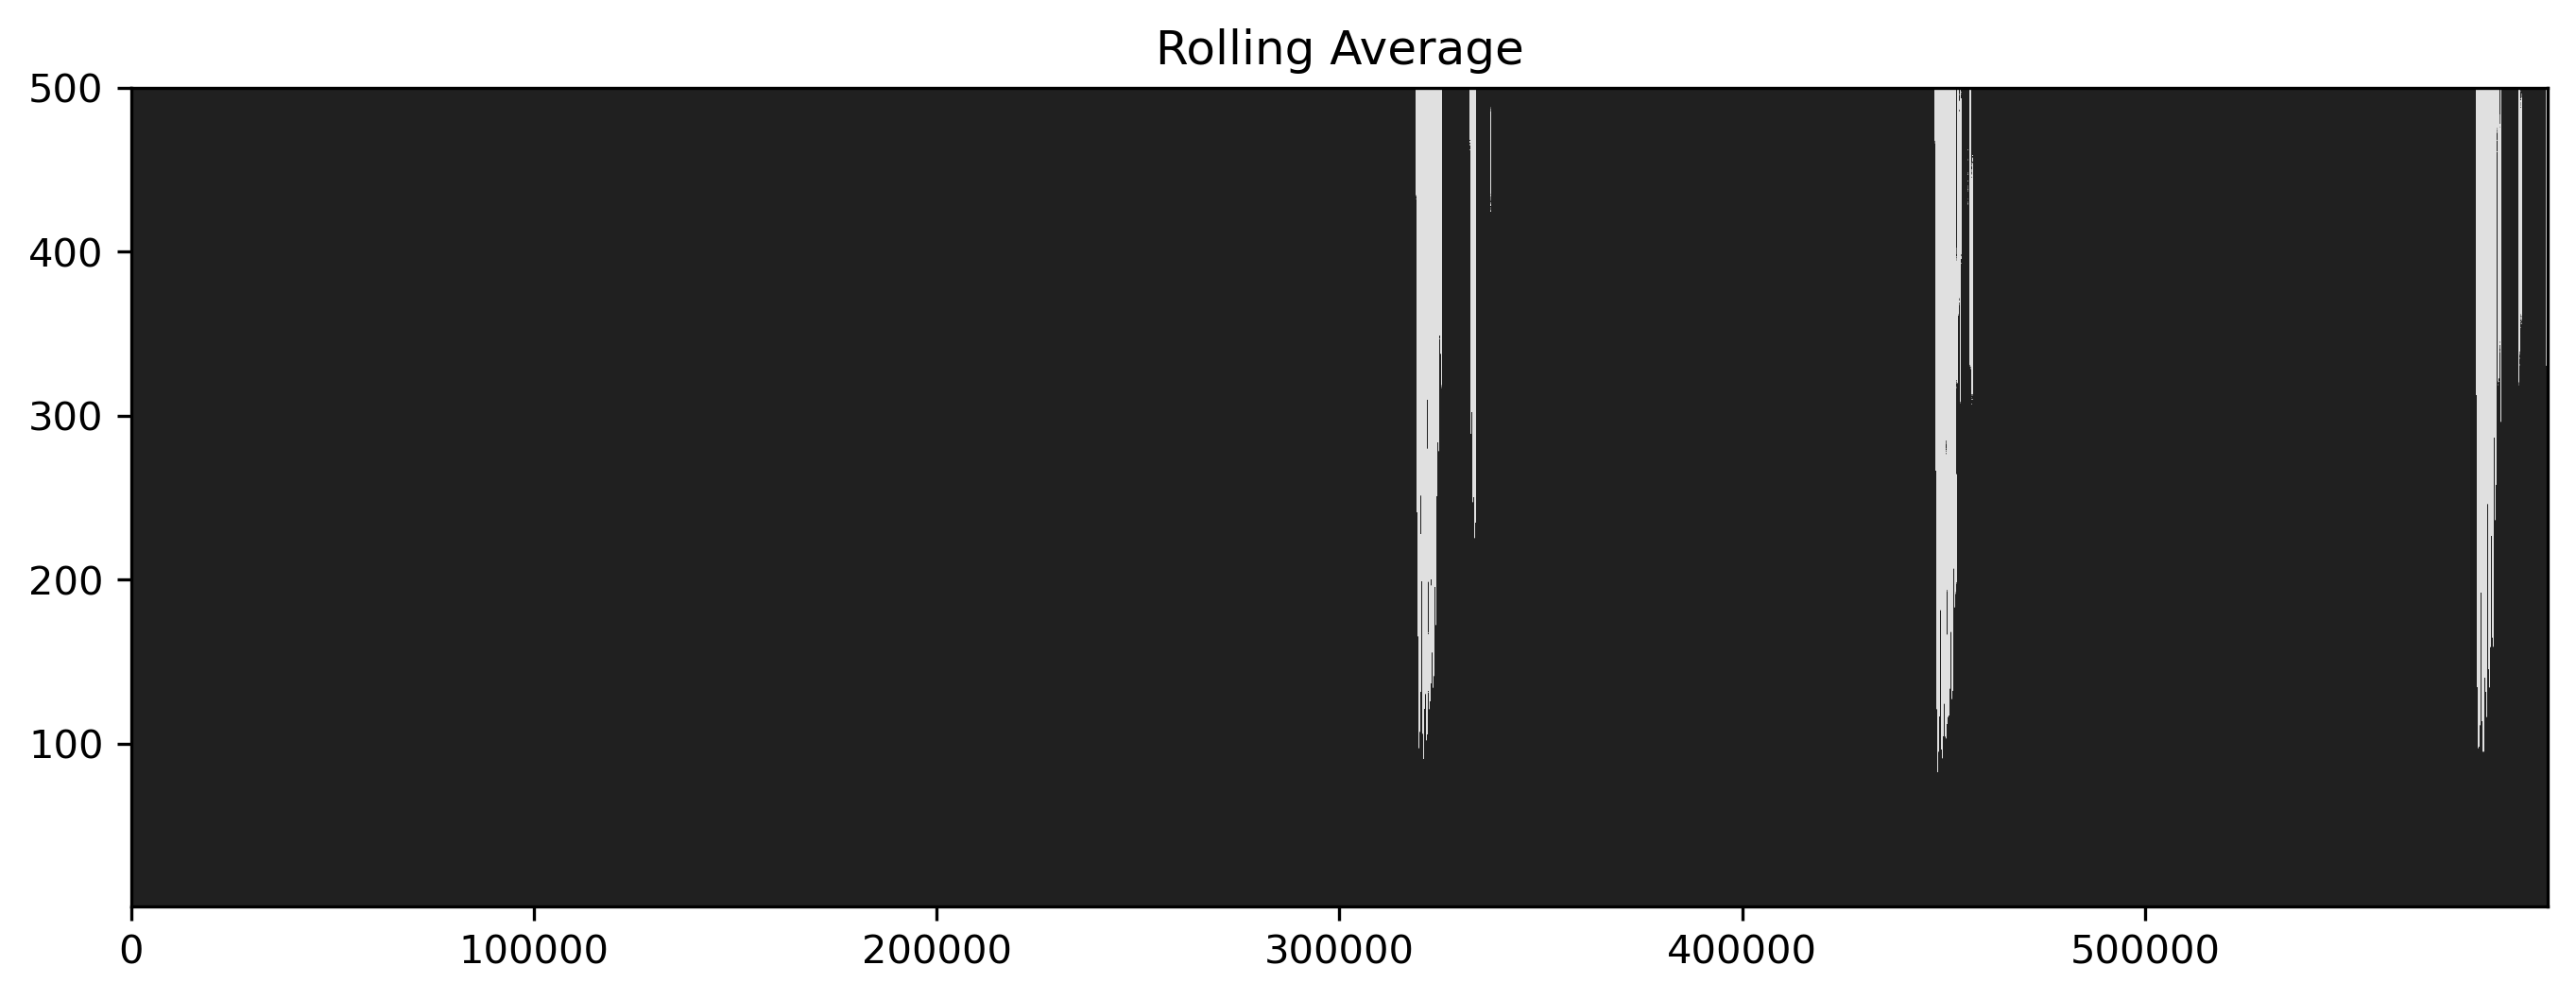

1

In [31]:
fprint11 = cf.getThumbprint2(Clean11, wvlt, scales,2)
cf.PlotFingerPrint(fprint11.T, 'Rolling Average' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

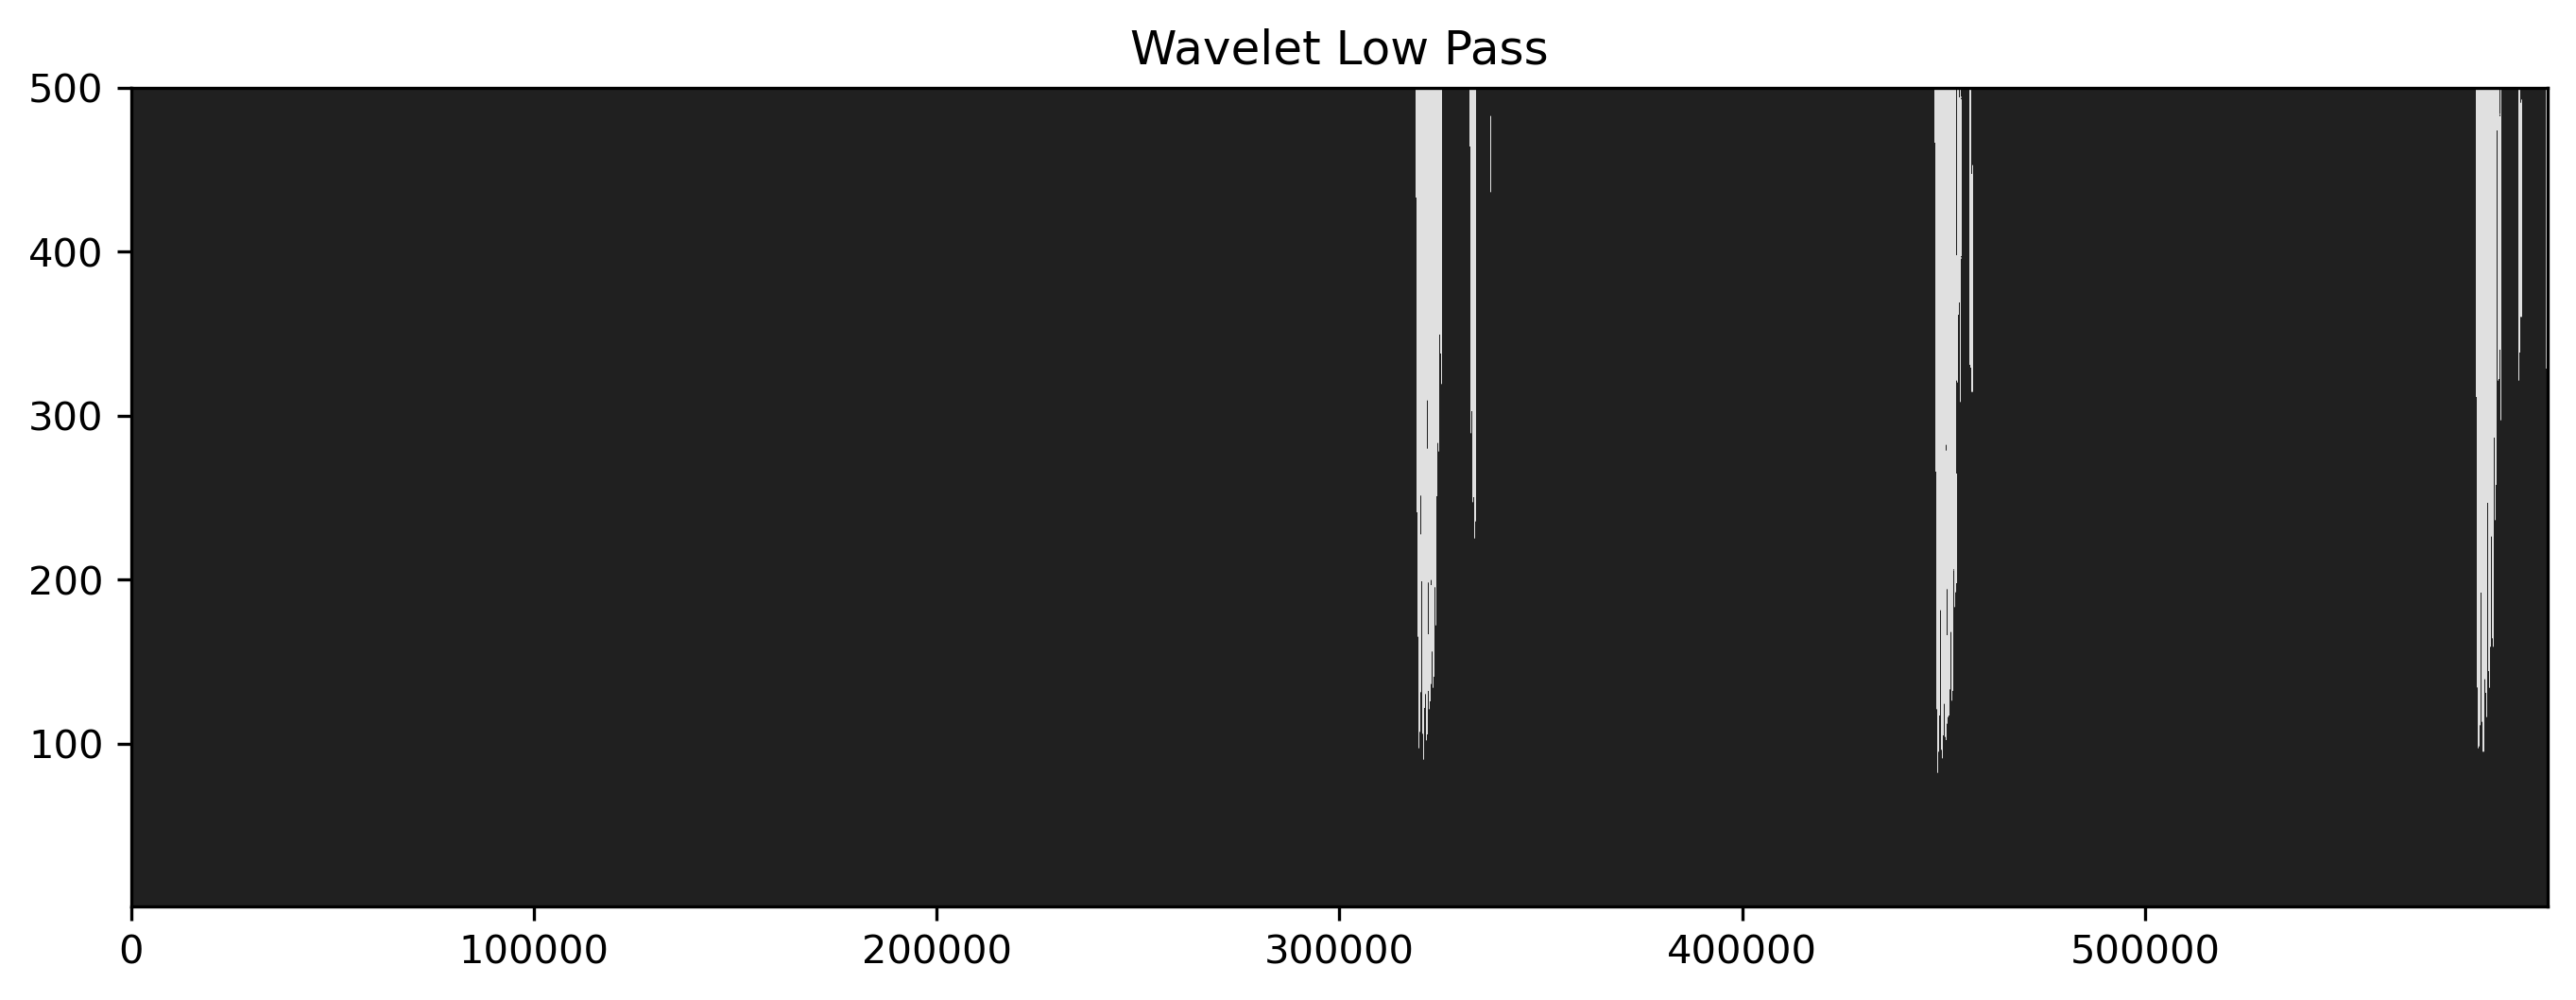

1

In [32]:
fprint12 = cf.getThumbprint2(Clean12, wvlt, scales,2)
cf.PlotFingerPrint(fprint12.T, 'Wavelet Low Pass' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

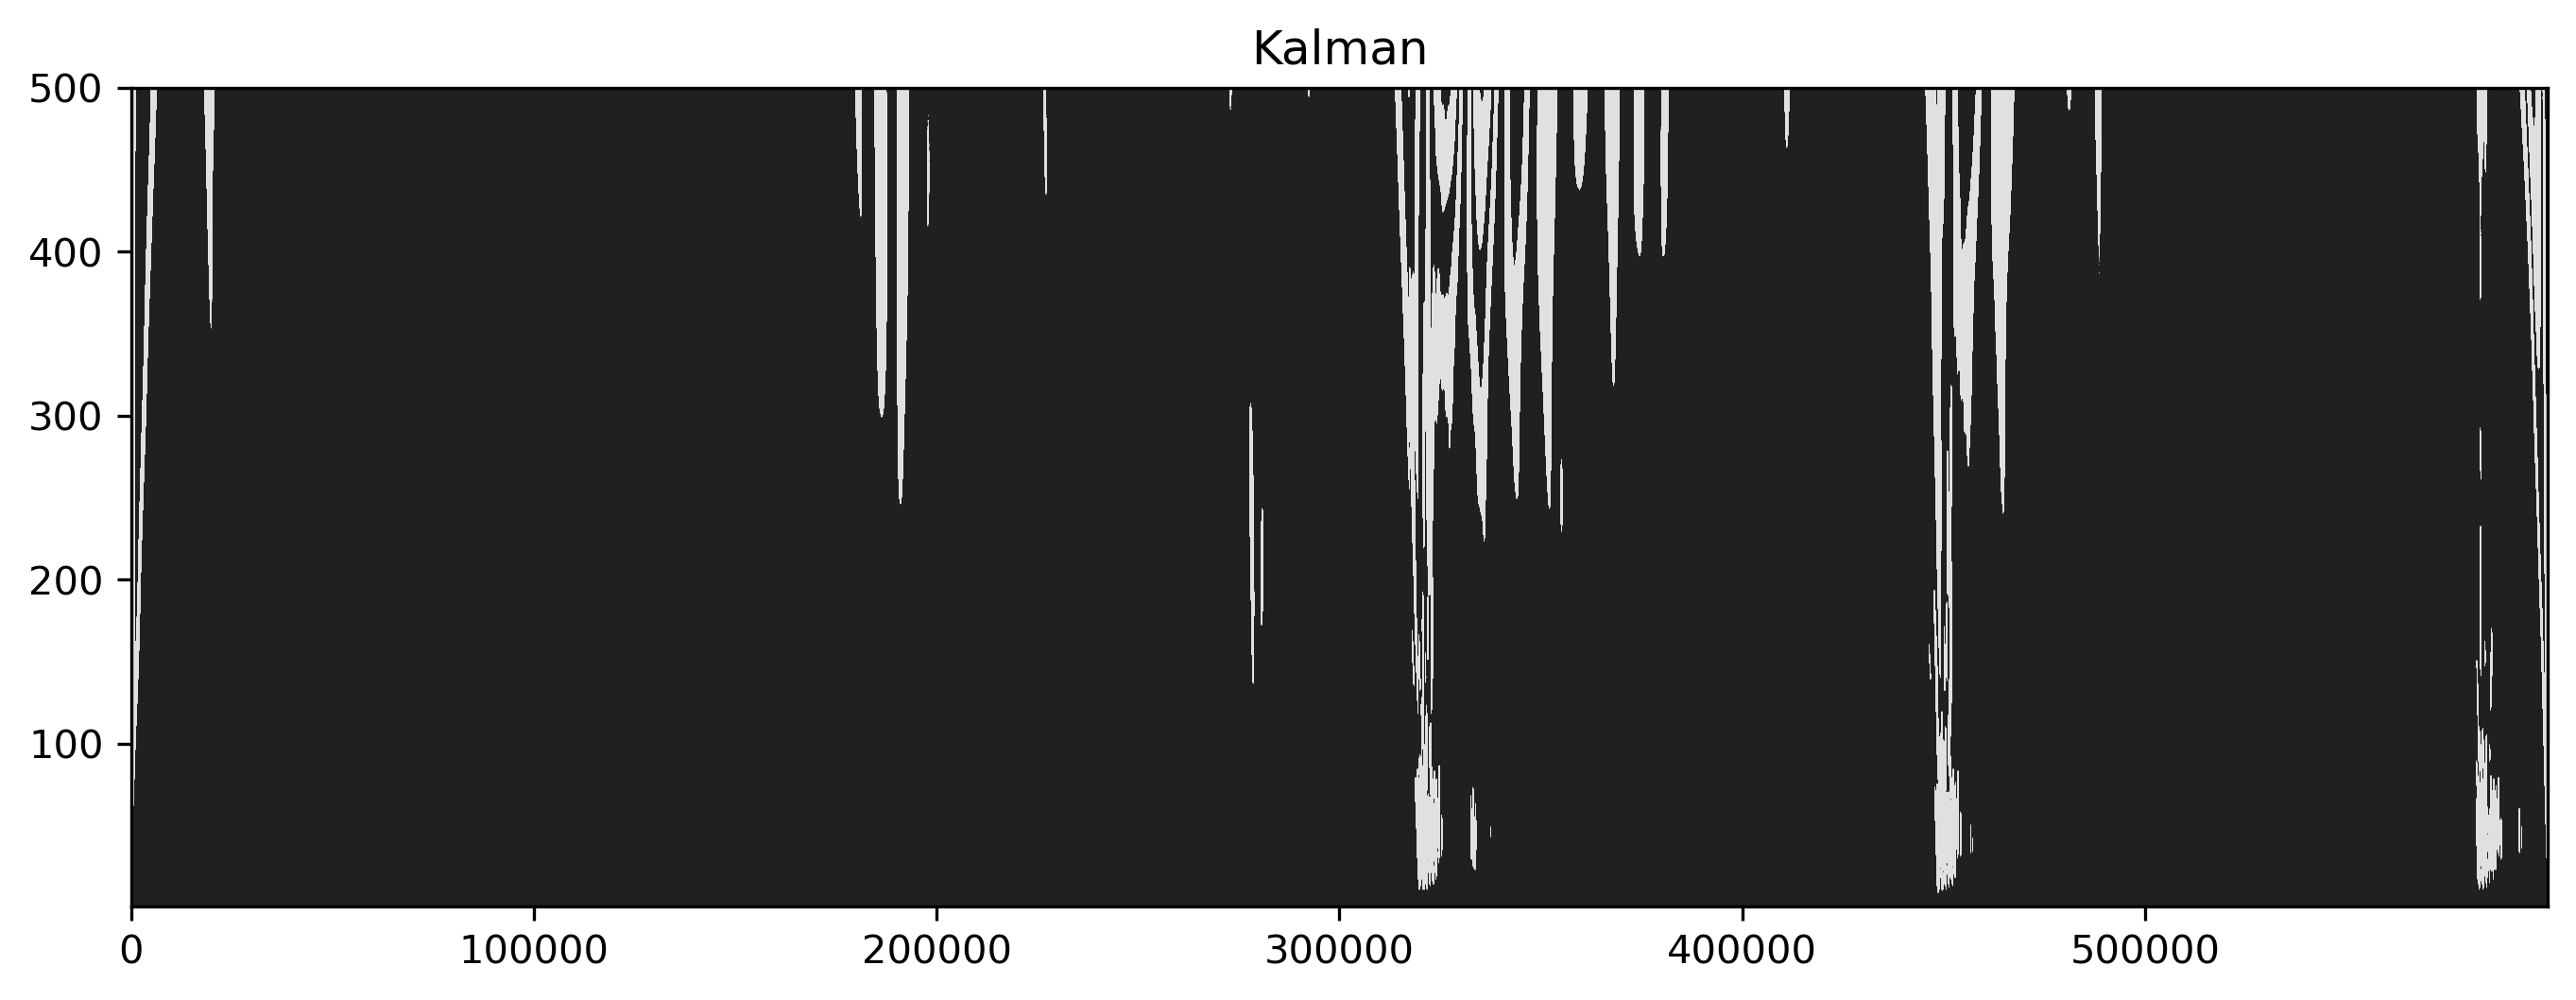

1

In [33]:
fprint13 = cf.getThumbprint2(Clean13, wvlt, scales,20)
cf.PlotFingerPrint(fprint13.T, 'Kalman' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

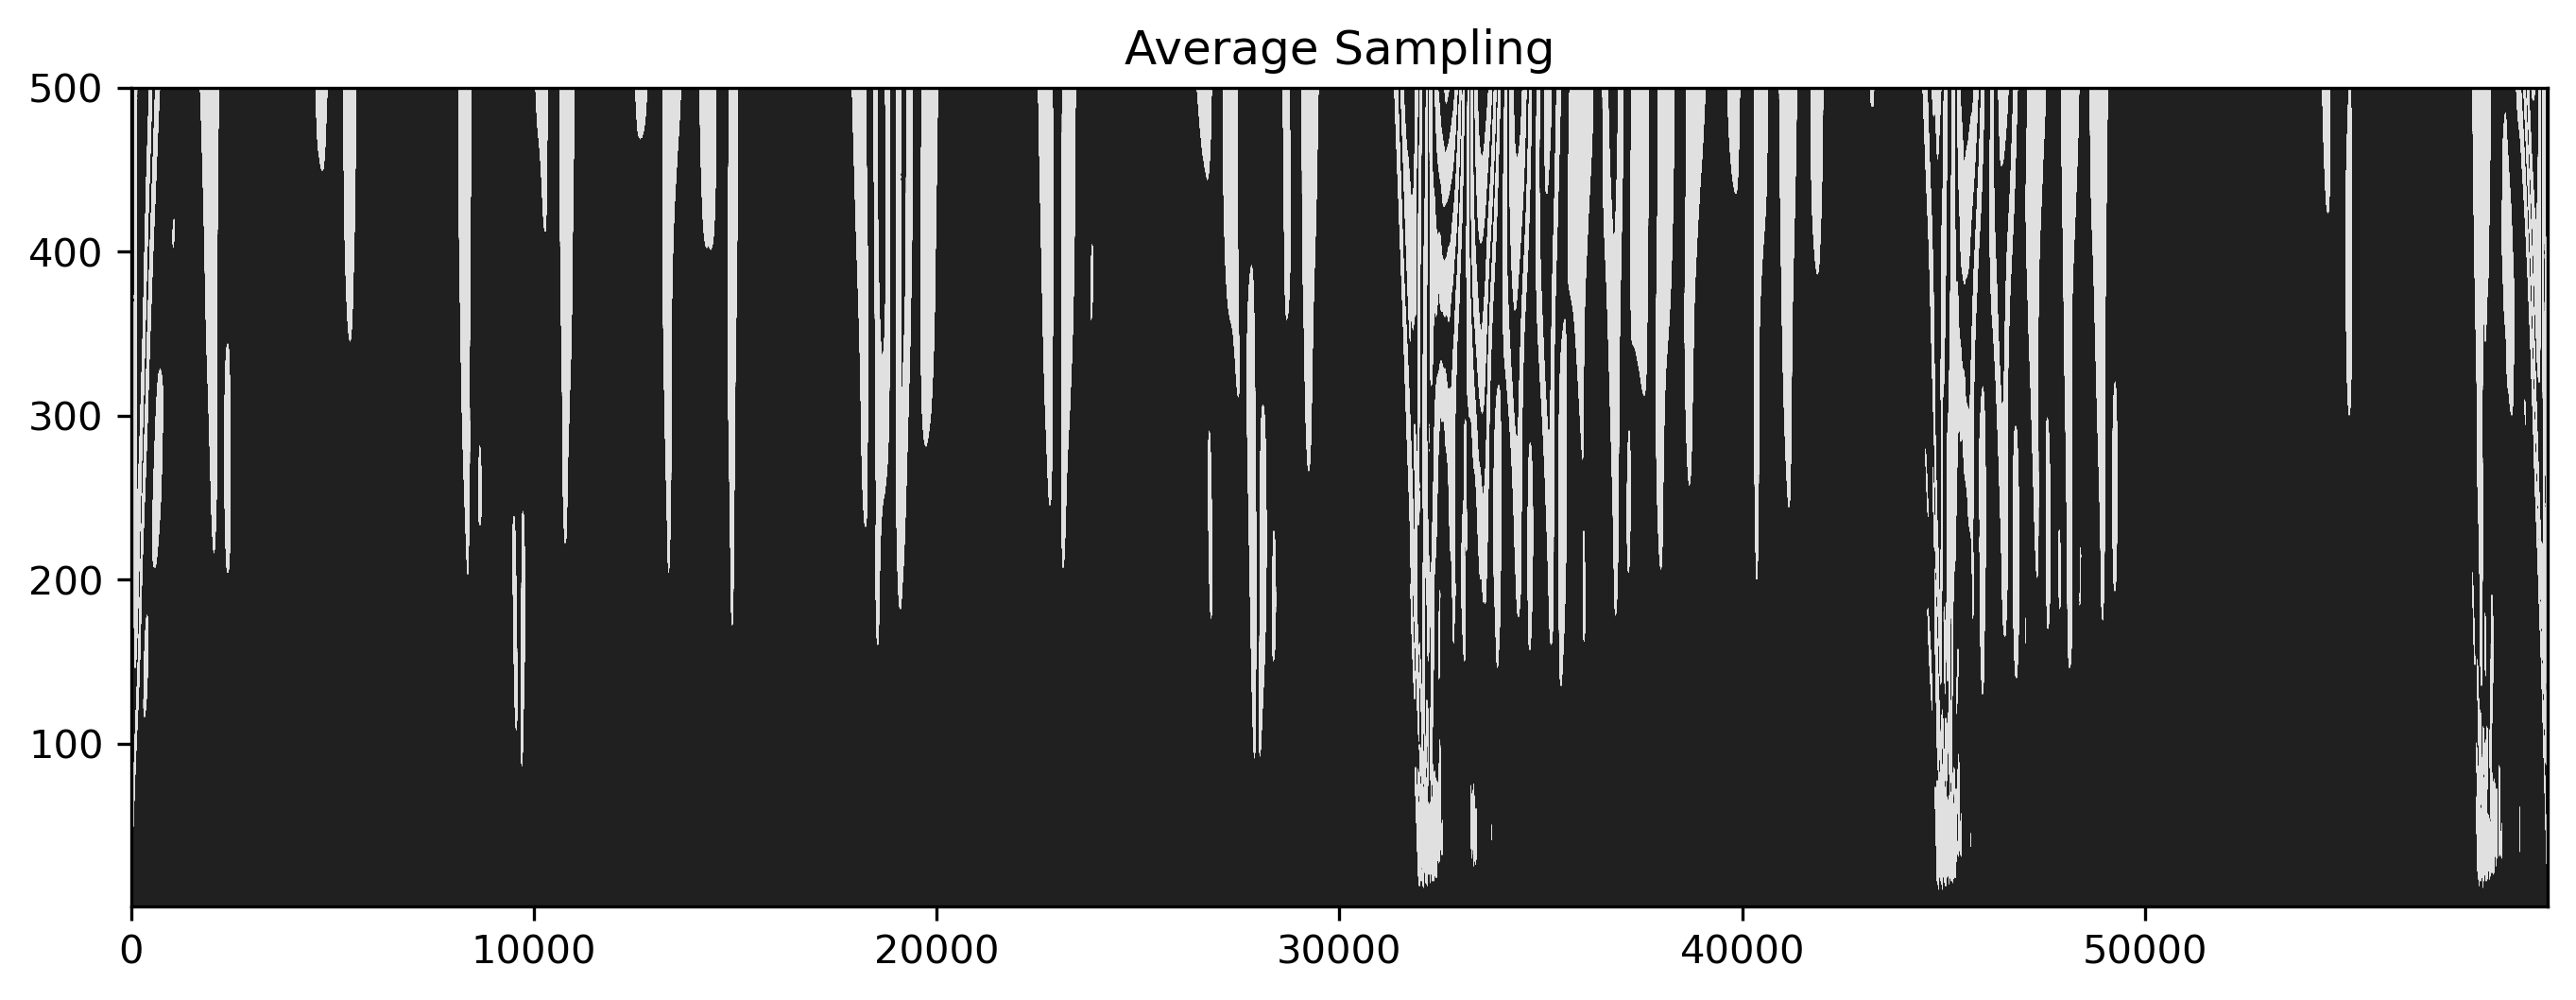

1

In [34]:
fprint11b = cf.getThumbprint2(Clean11b, wvlt, scales,2)
cf.PlotFingerPrint(fprint11b.T, 'Average Sampling' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

In [35]:
start=315000
end = 350000

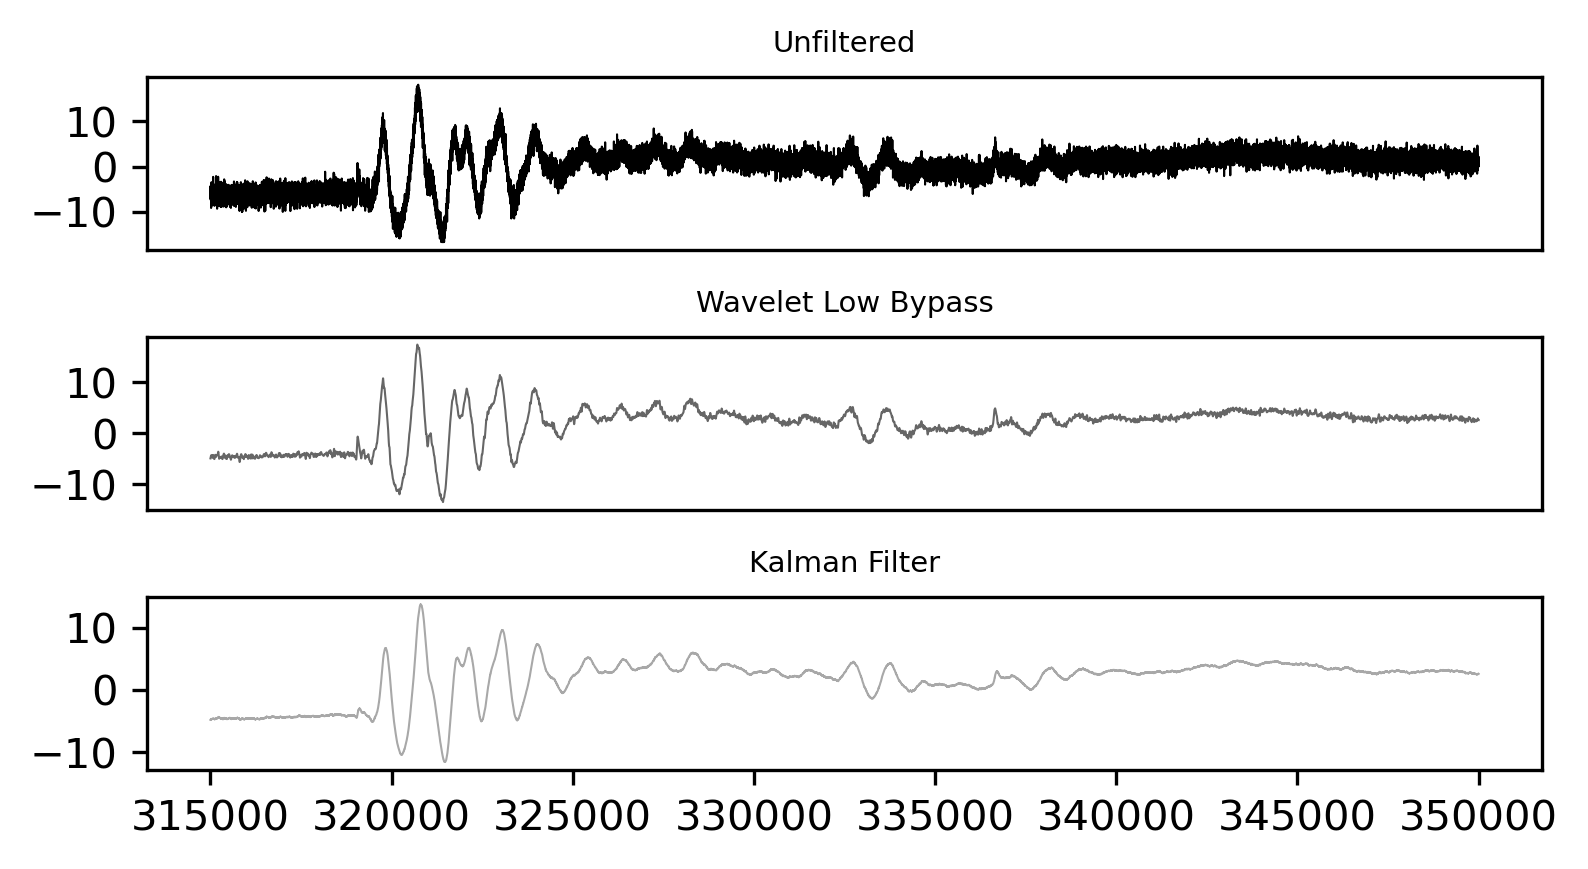

In [36]:
fig,axs = plt.subplots(3,figsize=(6,3), dpi=Fdpi)
plt.subplots_adjust(hspace=0.5)
axs[0].plot((Clean11[start:end]-np.average(Clean11[start:end])), label='Channel 0',linewidth=0.5)
axs[0].set_title('Unfiltered', fontsize=7)
axs[0].set_xticks([])
axs[1].plot(Clean12[start:end], label='Channel 1',linewidth=0.5, color='0.4')
axs[1].set_title('Wavelet Low Bypass', fontsize=7)
axs[1].set_xticks([])
axs[2].plot(np.arange(start,end),Clean13[start:end], label='Kalman',linewidth=0.5,color='0.66')
axs[2].set_title('Kalman Filter', fontsize=7)
plt.show()

In [38]:
i=0
j=300000
k=0
while i==0:
    
    if Clean11[j] > 0:
        k = 1
        print(j)
    if k==1 and Clean11[j] < 0:
        i = 0
    j+=1
    if j == 325000:
        i = 1
    

301674
307827
318165
318401
318414
319059
319061
319067
319071
319076
319082
319095
319108
319538
319579
319580
319585
319601
319612
319615
319616
319617
319621
319626
319628
319629
319631
319633
319635
319636
319637
319638
319639
319640
319641
319642
319643
319644
319645
319646
319647
319648
319649
319650
319652
319653
319654
319655
319656
319657
319658
319659
319660
319661
319662
319663
319664
319665
319666
319667
319668
319669
319670
319671
319672
319673
319674
319675
319676
319677
319678
319679
319680
319681
319682
319683
319684
319685
319686
319687
319688
319689
319690
319691
319692
319693
319694
319695
319696
319697
319698
319699
319700
319701
319702
319703
319704
319705
319706
319707
319708
319709
319710
319711
319712
319713
319714
319715
319716
319717
319718
319719
319720
319721
319722
319723
319724
319725
319726
319727
319728
319729
319730
319731
319732
319733
319734
319735
319736
319737
319738
319739
319740
319741
319742
319743
319744
319745
319746
319747
319748
319749
319750

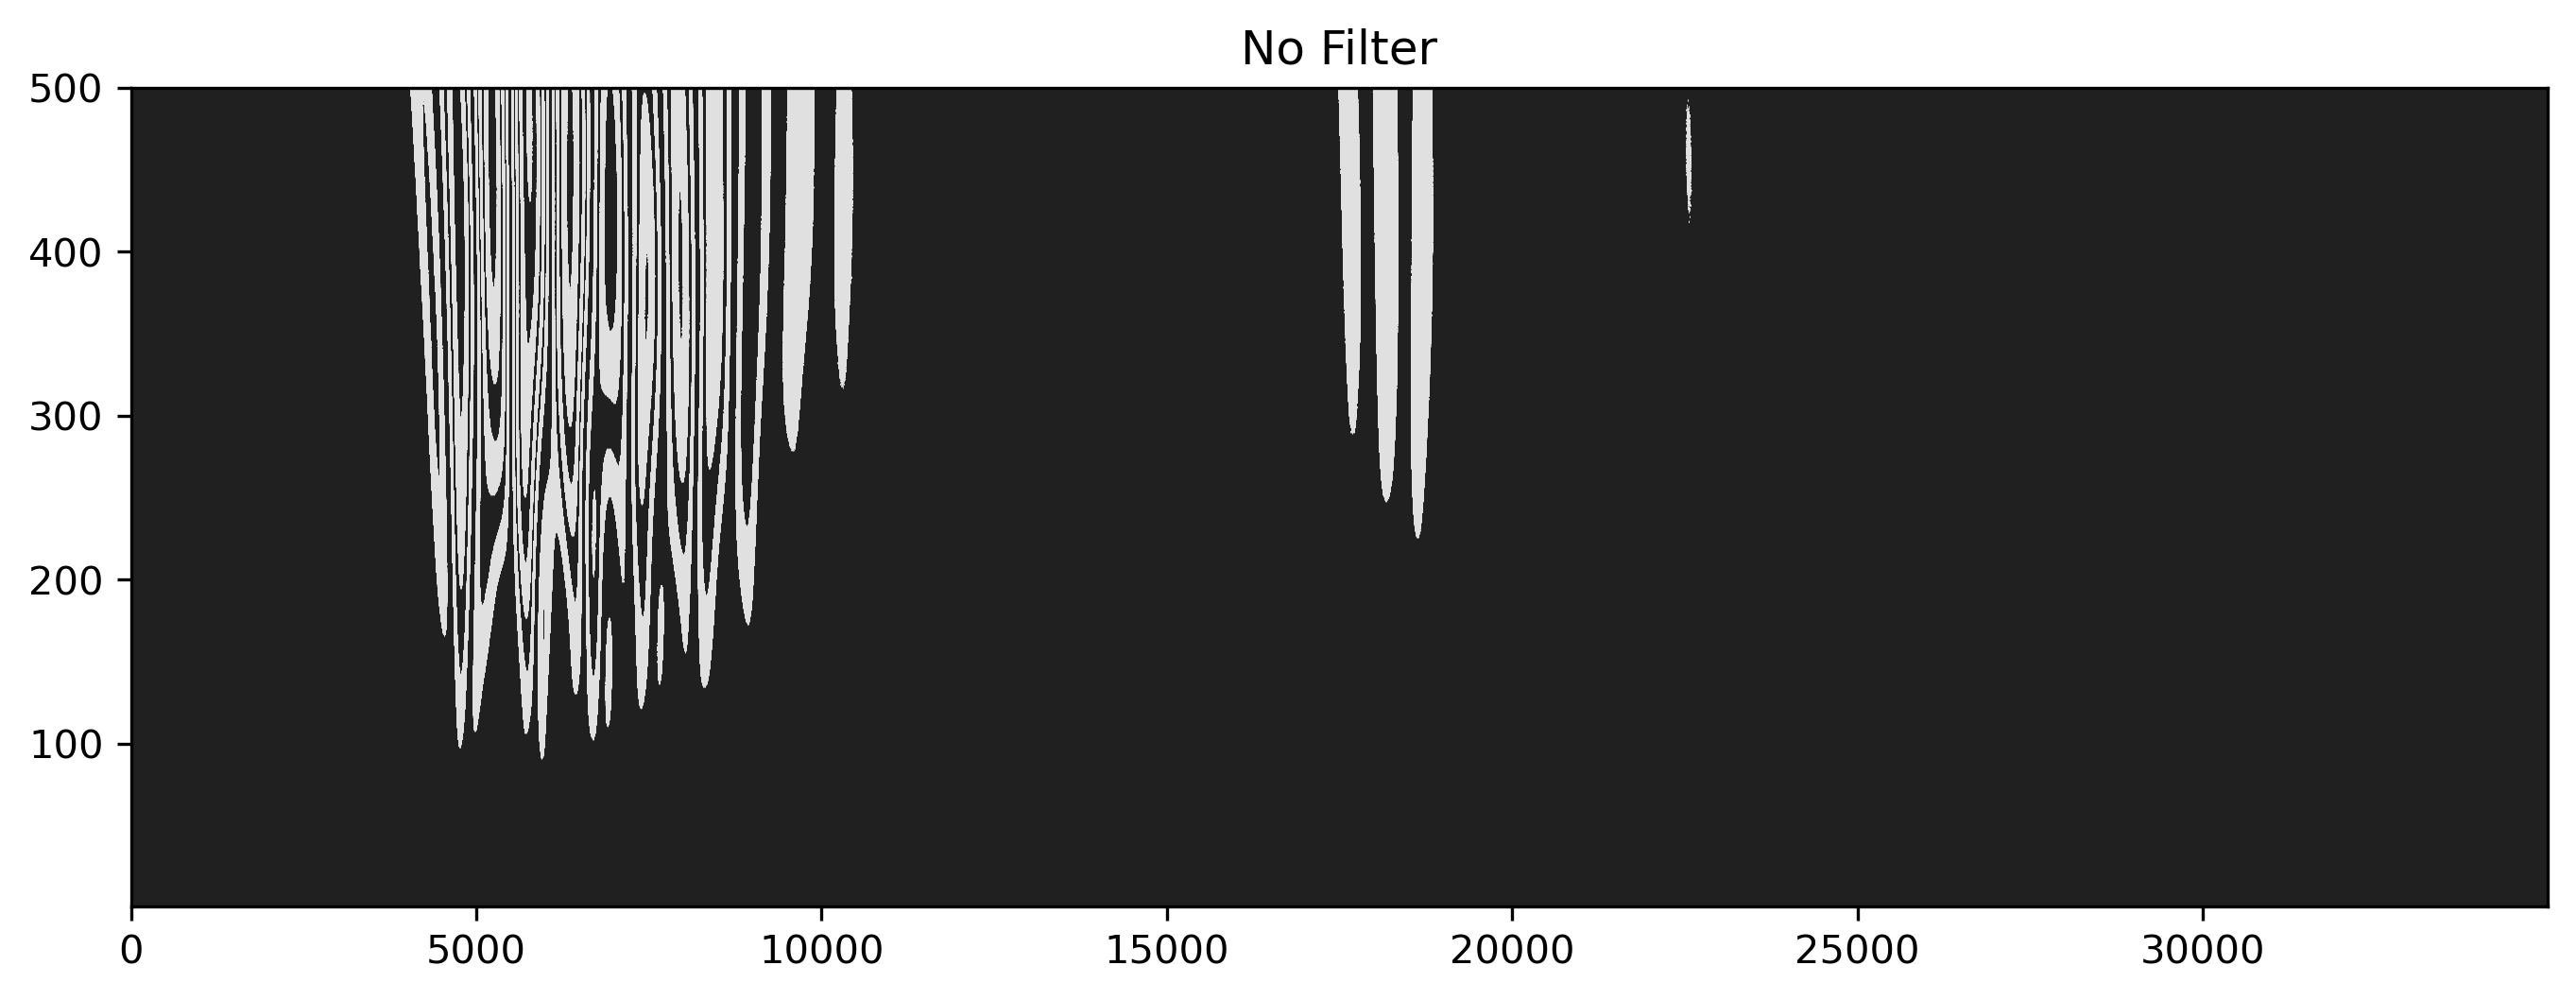

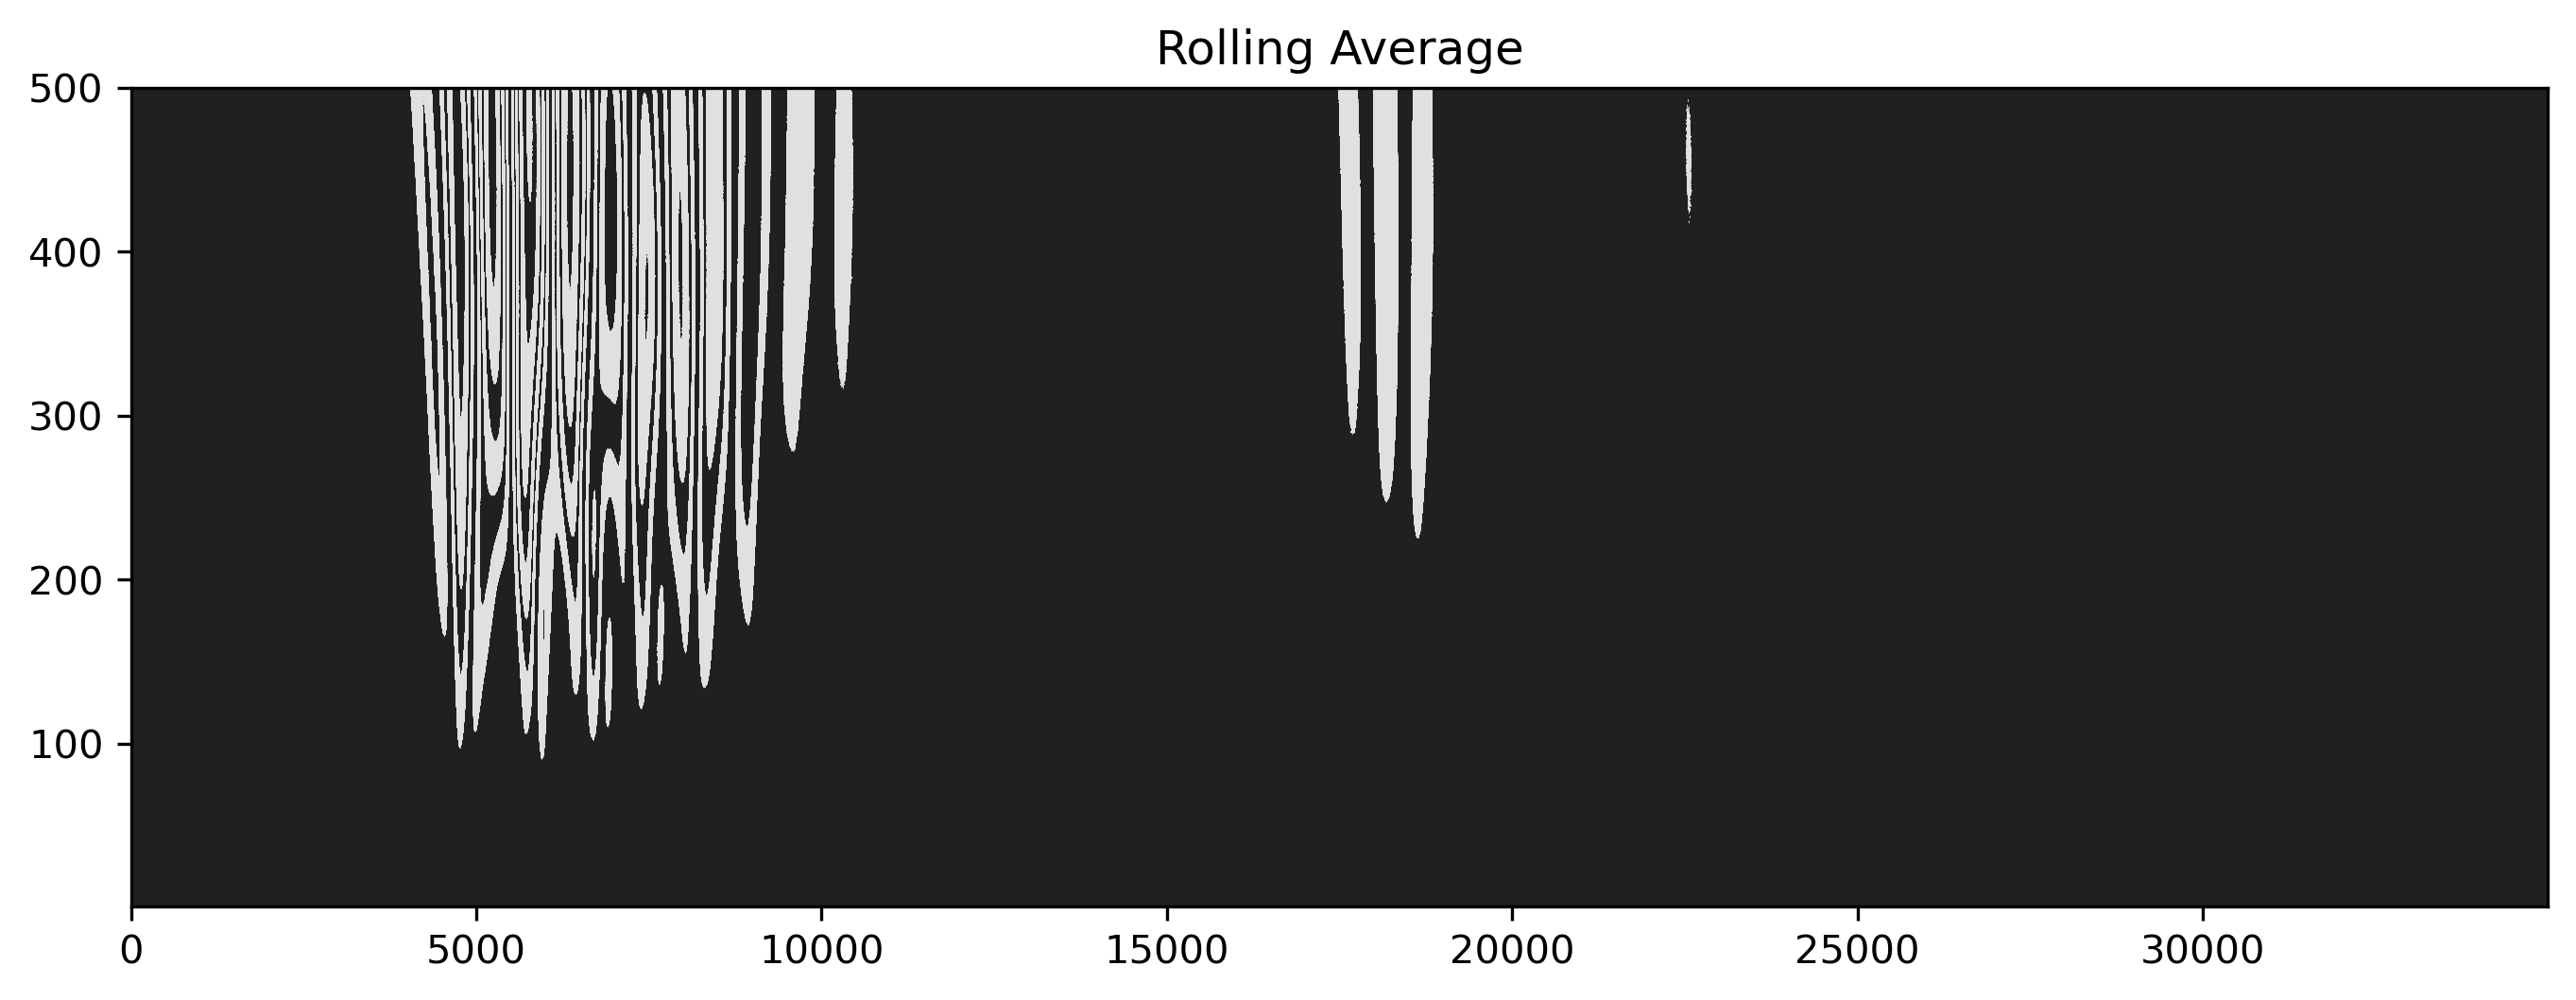

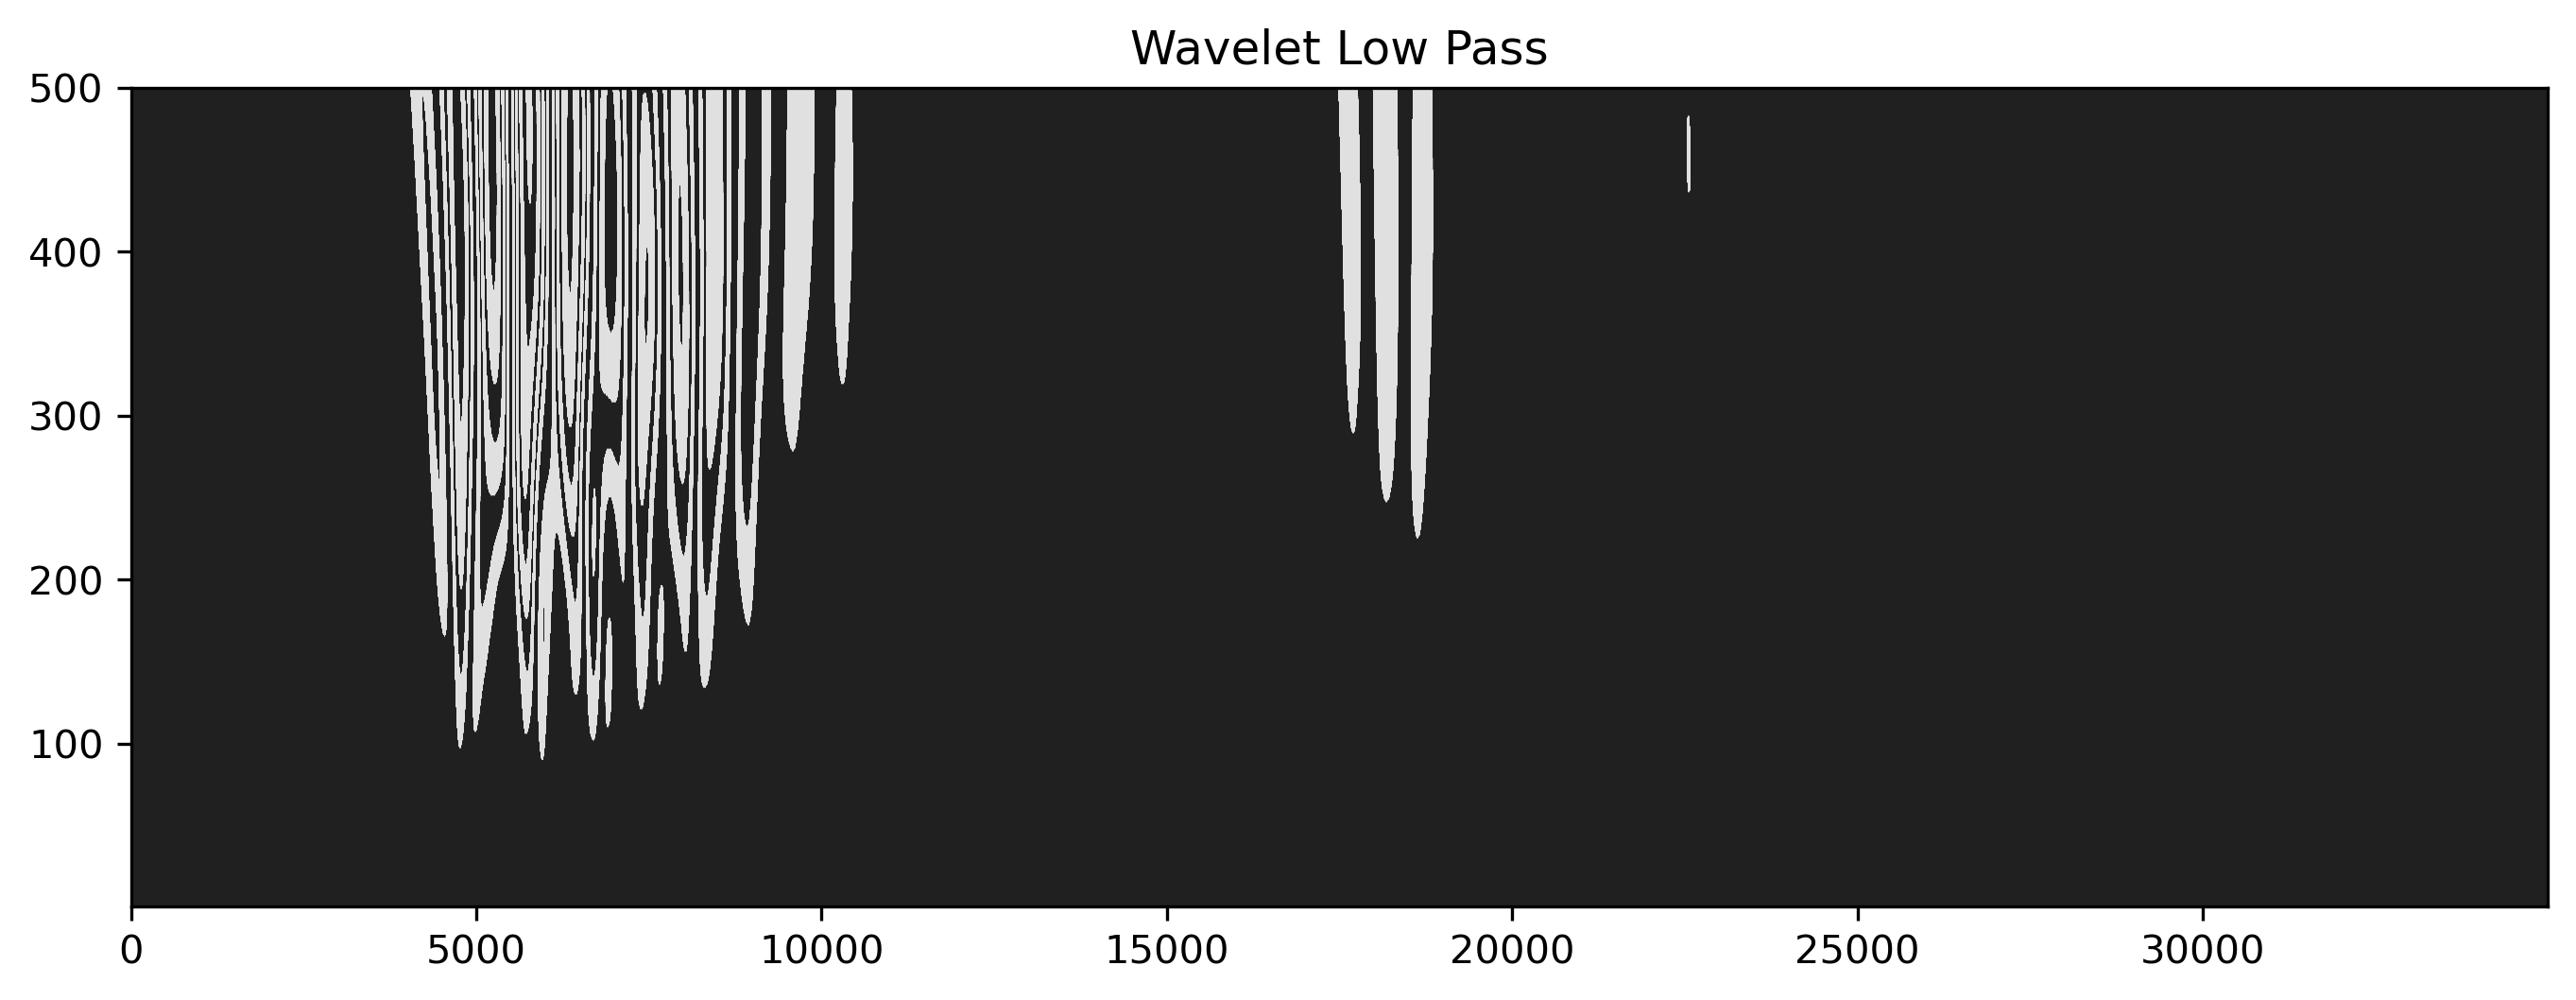

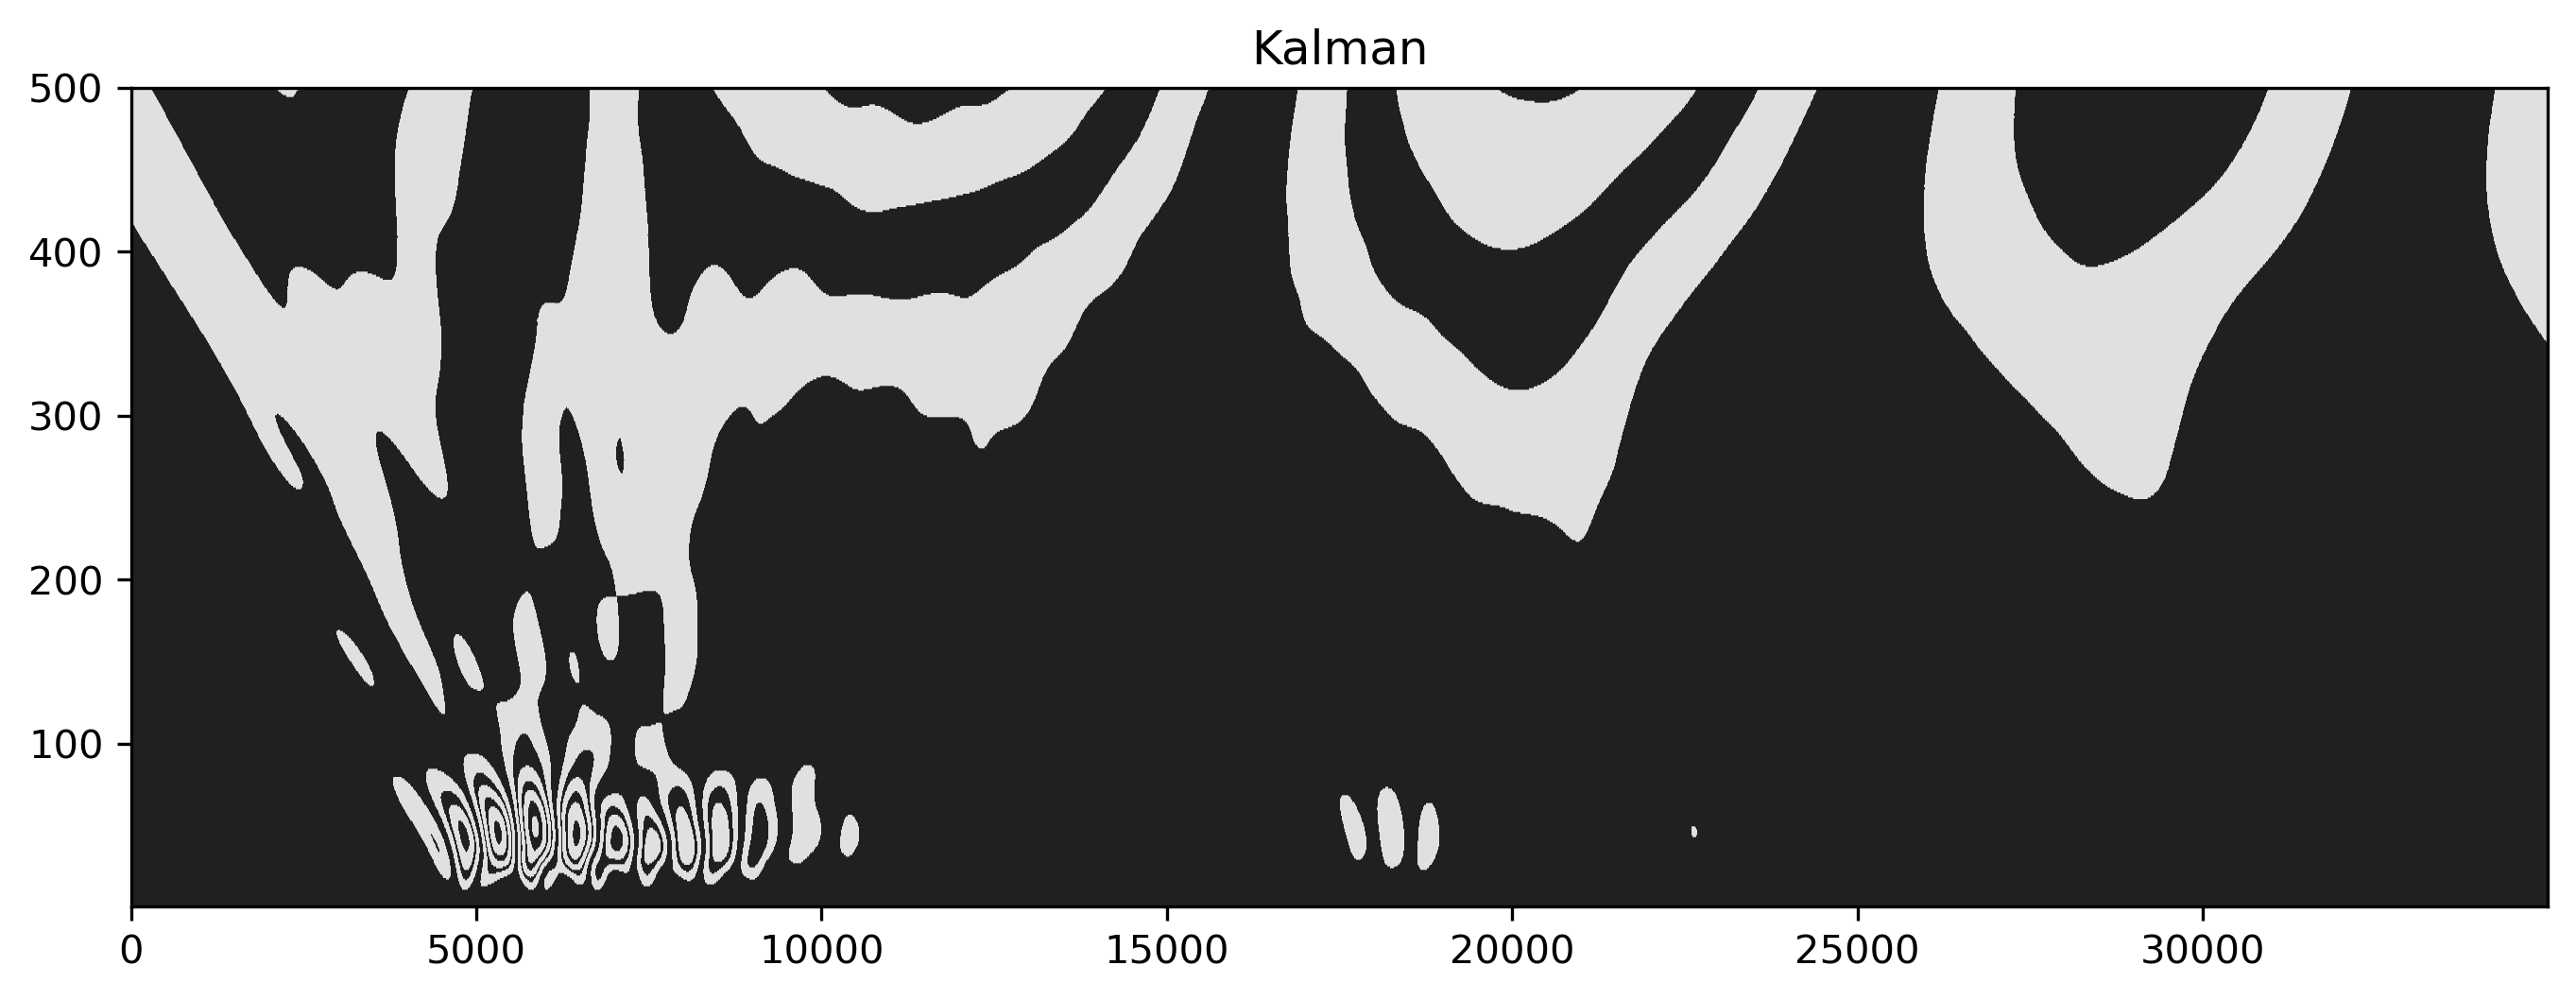

In [39]:
a=cf.PlotFingerPrint(fprint10[start:end].T, 'No Filter' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
a=cf.PlotFingerPrint(fprint11[start:end].T, 'Rolling Average' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
a=cf.PlotFingerPrint(fprint12[start:end].T, 'Wavelet Low Pass' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
a=cf.PlotFingerPrint(fprint13[start:end].T, 'Kalman' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)


/local/scr/dchendrickson01/TMPDIR/ipykernel_149814/2569708026.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[j].set_xticklabels(axs[j].get_xticks(),fontsize=5)
/local/scr/dchendrickson01/TMPDIR/ipykernel_149814/2569708026.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[j].set_yticklabels(axs[j].get_yticks(),fontsize=5)


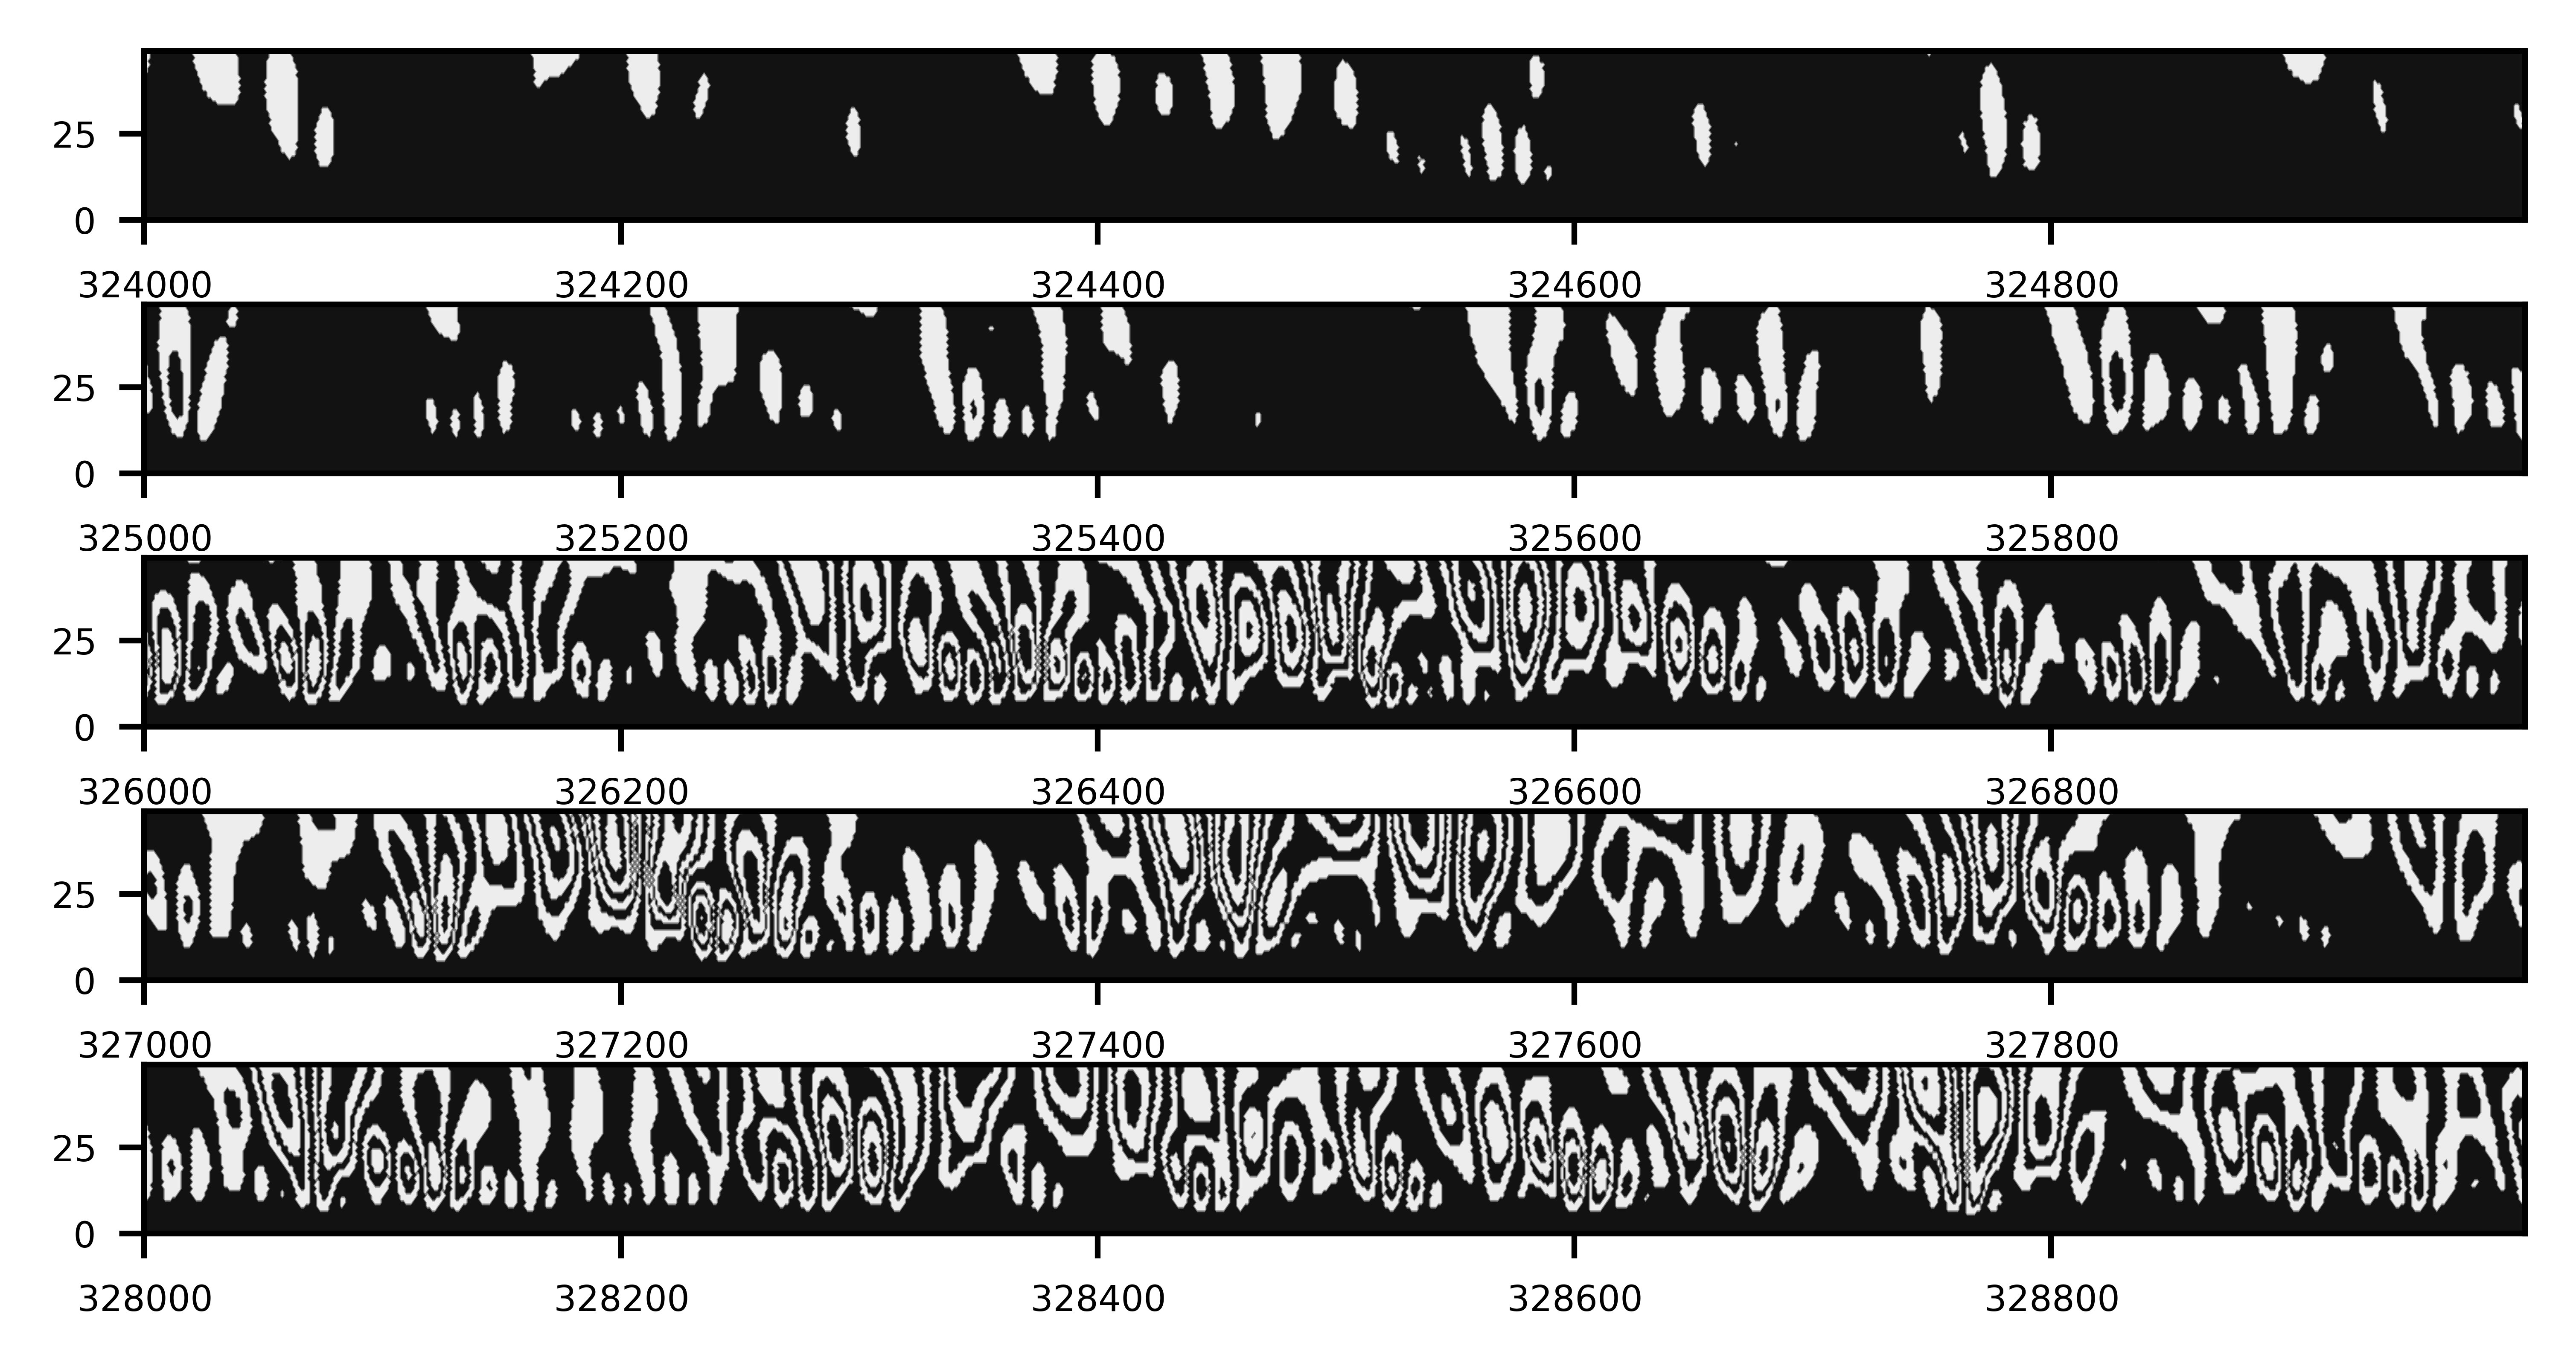

In [40]:
fig,axs = plt.subplots(5,figsize=(6,3), dpi=1200)
plt.subplots_adjust(hspace=0.5)
Y = np.arange(0,50)

for j in range(5):
    i=j+3
    start = 320000 + i*1000
    end = start + 3000
    Data = ODataSet[:,0]-ODataSet[:,1]
    NData = cf.Smoothing(Data,2,dets_to_remove=3)[start:end]
    NData -= np.average(NData)
    newFP = cf.getThumbprint2(NData, wvlt, 50,1)
    X = np.arange(start+1000,end-1000,dtype=int)
    axs[j].contourf(X,Y,newFP[1000:2000].T, cmap='gist_gray')
#    axs[j].xaxis.set_ticks(X)
    axs[j].set_xticklabels(axs[j].get_xticks(),fontsize=5)
    axs[j].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    axs[j].set_yticklabels(axs[j].get_yticks(),fontsize=5)
    axs[j].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    #plt.title(str(start))
plt.show()




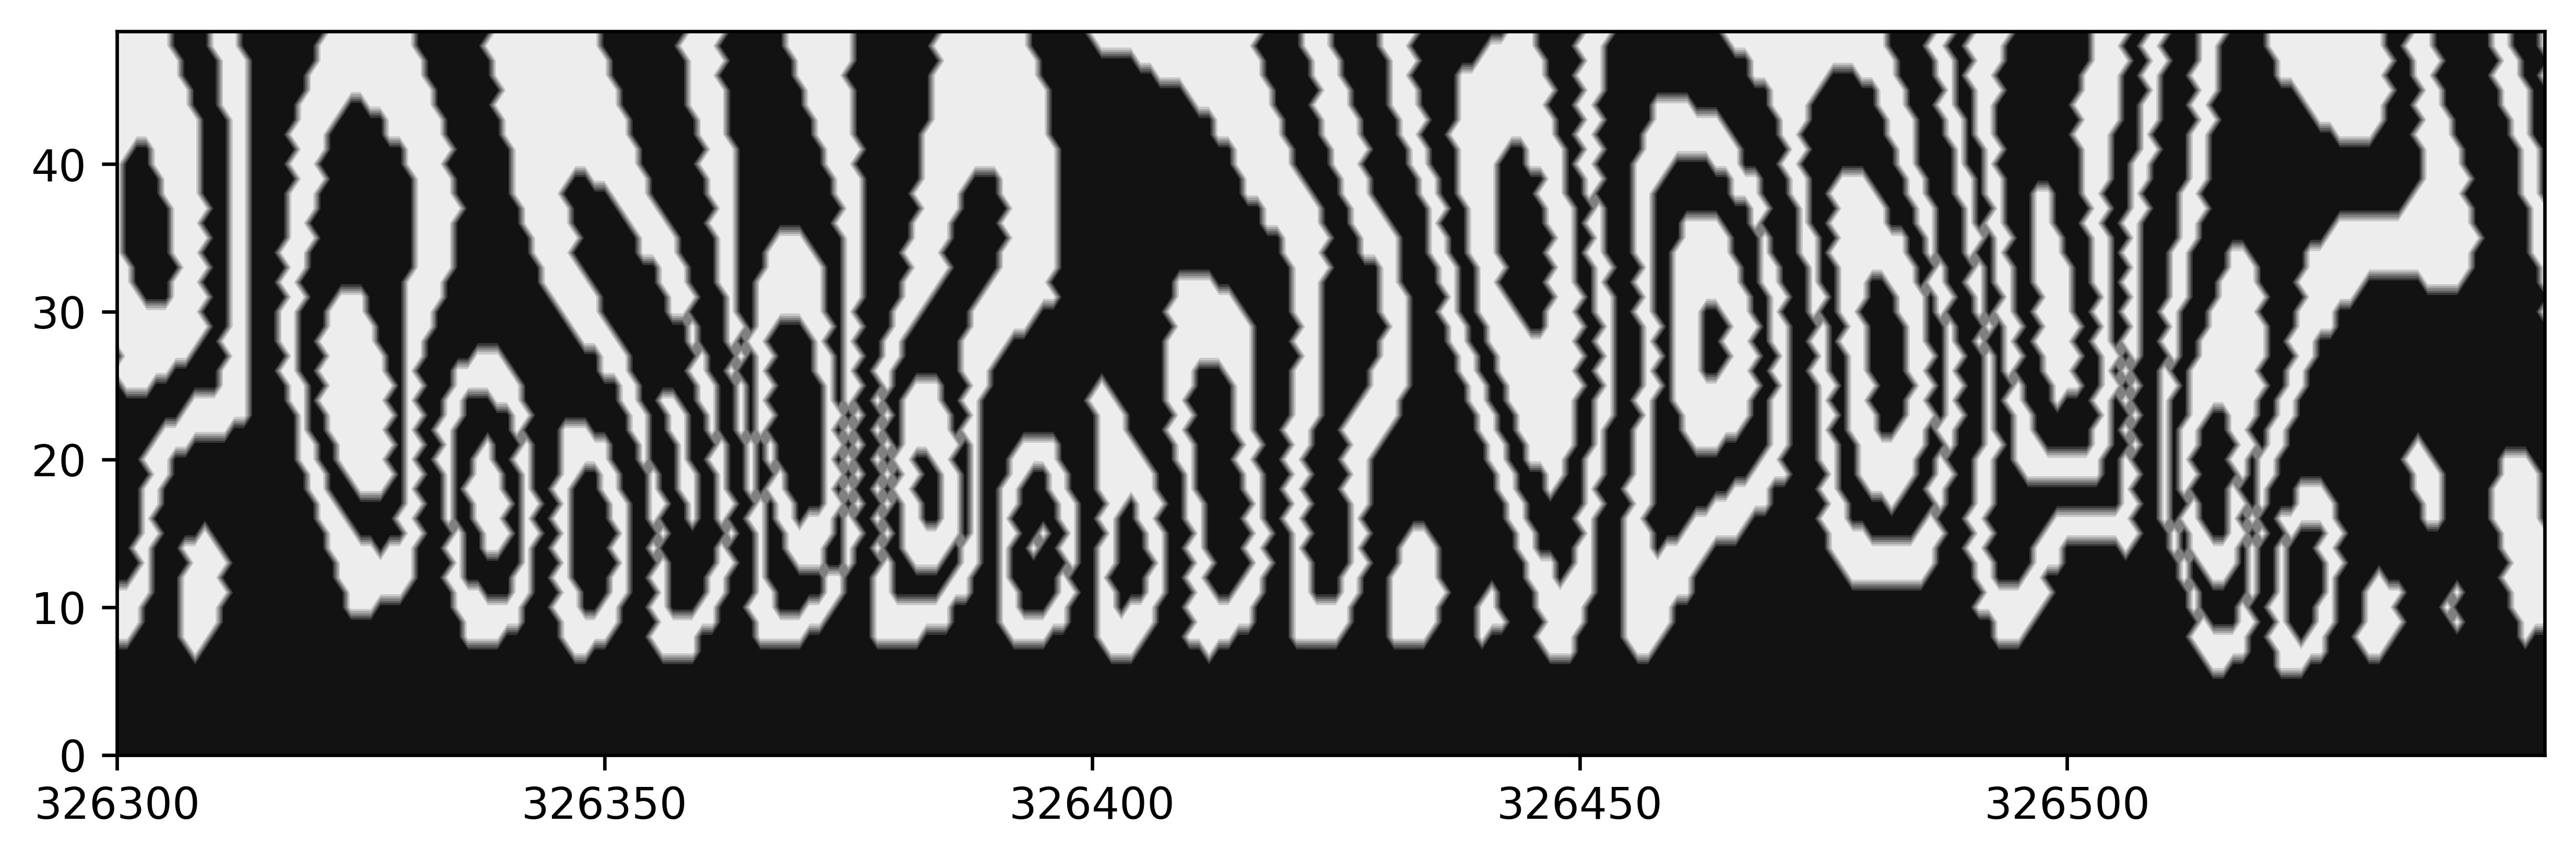

In [42]:
start = 325000
START = 300

end = start + 4000
Data = ODataSet[:,0]-ODataSet[:,1]
NData = cf.Smoothing(Data,2,dets_to_remove=3)[start:end]
NData -= np.average(NData)
newFP = cf.getThumbprint2(NData, wvlt, 50,1)
X = np.arange(start+START+1000,start+START+1250)
fig = plt.figure(figsize=(10,3), dpi=600)
plt.contourf(X,Y,newFP[START+1000:START+1250].T, cmap='gist_gray')
#plt.title(str(start))
plt.show()


# Tangent

In [ ]:
asdfasdf

In [ ]:
fps12 = cf.getThumbprint2(Clean12[start:end], wvlt, scales,1)
cf.PlotFingerPrint(fps12.T, 'Wavelet Low Pass' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

fps12 = cf.getThumbprint2((Clean12[start:end]-np.average(Clean12[start:end])), wvlt, scales,1)
cf.PlotFingerPrint(fps12.T, 'Wavelet Low Pass' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)


In [ ]:
cf.PlotFingerPrint(fps13.T, 'Kalman' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)
fps13 = cf.getThumbprint2(Clean13[start:end], wvlt, scales,1)

fps12 = cf.getThumbprint2((Clean13[start:end]-np.average(Clean13[start:end])), wvlt, scales,1)
cf.PlotFingerPrint(fps12.T, 'Kalman' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)


In [ ]:
b_notch, a_notch = signal.iirnotch(1/369.67, 0.0001, 200000)

In [ ]:
Clean1m3375 = signal.filtfilt(b_notch, a_notch, Clean13)

In [ ]:
b_notch, a_notch = signal.iirnotch(1/740, 0.0001, 200000)
Clean1m3740 = signal.filtfilt(b_notch, a_notch, Clean1m3375)
b_notch, a_notch = signal.iirnotch(1/1110, 0.0001, 200000)
Clean1m31110 = signal.filtfilt(b_notch, a_notch, Clean1m3375)

In [ ]:
Clean1m3375-=np.average(Clean1m3375[10000:])
Clean1m3740-=np.average(Clean1m3740[10000:])
Clean1m31110-=np.average(Clean1m31110[10000:])


In [ ]:
fig = plt.figure()
#plt.plot(Clean13)
plt.plot(Clean1m3375)
plt.plot(Clean1m3740)
plt.plot(Clean1m31110)

plt.show()

In [ ]:
yf = np.fft.rfft(Clean1m3375)
xf = np.fft.rfftfreq(len(Clean1m3375), 1/SR)

In [ ]:
Clean13m3 = cf.Smoothing(Clean1m3375,3)

In [ ]:
start=50

plt.figure(figsize=(20, 16))
plt.subplot(611)
plt.plot(Clean10[start:])
plt.title('Generated Signal')

plt.subplot(612)
plt.plot(Clean13[start:])
plt.title('Kalman')

plt.subplot(613)
plt.plot(Clean10b[start:])
plt.title('Butter High')

plt.subplot(614)
plt.plot(Clean13b[start:])
plt.title('Kalman then Butter')

plt.subplot(615)
plt.plot(Clean1b3[start:])
plt.title('Butter then Kalman')


plt.subplot(616)
plt.plot(Clean1m3375[start:])
plt.title('notch 369')


plt.show()

In [ ]:
FP10 = cf.getThumbprint2(Clean10, wvlt, scales,2)
a = cf.PlotFingerPrint(FP10.T, 'No Filter' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

In [ ]:
FP13 = cf.getThumbprint2(Clean13, wvlt, scales,2)
a = cf.PlotFingerPrint(FP13.T, 'No Filter' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

In [ ]:
FP10 = cf.getThumbprint2(Clean10b, wvlt, scales,2)
a = cf.PlotFingerPrint(FP10.T, 'No Filter' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

In [ ]:
FP13b = cf.getThumbprint2(Clean1m3740, wvlt, scales,2)
a = cf.PlotFingerPrint(FP13b.T, 'No Filter' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

In [ ]:
FP1b3 = cf.getThumbprint2(Clean1m3740, wvlt, scales,2)
a = cf.PlotFingerPrint(FP1b3.T, 'No Filter' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

In [ ]:
FP13m3 = cf.getThumbprint2(Clean1m31110, wvlt, scales,2)
a = cf.PlotFingerPrint(FP13m3.T, 'notcch' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)

In [ ]:
FP1m3375 = cf.getThumbprint2(Clean1m3375, wvlt, scales,2)
a = cf.PlotFingerPrint(FP13m3.T, 'notcch' , ToSave =  False, Show=True, Titles=True, Pdpi=Fdpi)